# Persepolise Group



## Members:

   ### *Mohsen SHAHVERDIKONDORI*
   ### *Ali NOSHAD*
   ### *Mohammad Hosein BEHZADIFARD*
   ### *Sajjad SALARI*

In [ ]:
! pip install datasets

In [144]:
from datasets import load_dataset

import pandas as pd
import numpy as np

import json

from collections import Counter

import matplotlib.pyplot as plt

from wordcloud import WordCloud

import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mohsen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mohsen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Load Dataset

In [58]:
from datasets import load_dataset
import json

# Load the dataset
dataset = load_dataset("eli5_category")

# Convert to pandas DataFrame
df = dataset['train'].to_pandas()

# Convert DataFrame to JSON
json_data = json.loads(df.to_json(orient='records'))

/Users/mohsen/Desktop/mohsen/linux/Offerland/OfferAg/env/lib/python3.9/site-packages/datasets/load.py:1486: FutureWarning: The repository for eli5_category contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/eli5_category
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [59]:
###### JUST FOR TEST ######

# Print the first few records to understand the data structure
print(json.dumps(json_data[:3], indent=2))

[
  {
    "q_id": "5lchat",
    "title": "Why there was a 'leap second' added to the end of 2016?",
    "selftext": "",
    "category": "Other",
    "subreddit": "explainlikeimfive",
    "answers": {
      "a_id": [
        "dbuoyxl",
        "dbur7gi",
        "dbuotht"
      ],
      "text": [
        "the rotation of the earth is not a constant. in fact the rotation of the earth is slowing down, which means that a full day is getting slightly longer. without leap seconds our clocks would slowly drift ever so slightly out of sync with the actual day. we could deal with this by redefining how how long 1 second is, making it slightly longer so that one day is still exactly 24*60*60 seconds. but in practice that is really inconvenient for a lot of our technology which relies on very precise timing. its easier to just move us ahead one second every couple of years or so.",
        "The Earth's rotation is not regular. It varies a bit, so sometimes we add a second. We do this to ensure th

### This code snippet calculates the frequency of each unique category in a JSON dataset and prints the resulting counts

In [37]:
from collections import Counter  
category_counts = Counter(item['category'] for item in json_data if 'category' in item)
print(category_counts.most_common())

[('Biology', 32769), ('Other', 19312), ('Technology', 14034), ('Physics', 10196), ('Chemistry', 6633), ('Economics', 5901), ('Mathematics', 1912), ('Earth Science', 677), ('Psychology', 338)]


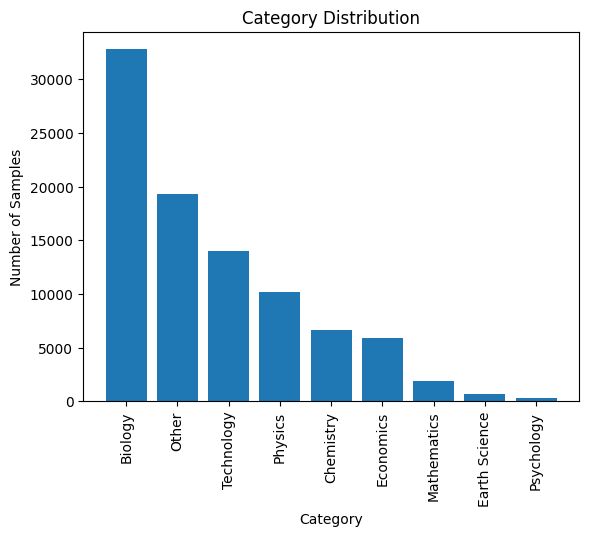

In [39]:
categories, counts = zip(*category_counts.most_common())
plt.bar(categories, counts)
plt.xlabel('Category')
plt.ylabel('Number of Samples')
plt.title('Category Distribution')
plt.xticks(rotation=90)  
plt.show()

### Find the most repeated words in title

In [41]:
word_freq = Counter()
for item in json_data:
    if 'title' in item:
        words = item['title'].split()
        word_freq.update(words)

print(word_freq.most_common(100))

[('the', 50248), ('a', 32821), ('Why', 32387), ('to', 30229), ('and', 25707), ('is', 25401), ('do', 25245), ('How', 22727), ('of', 22263), ('does', 20220), ('in', 19677), ('it', 17350), ('are', 14088), ('when', 13518), ('What', 11940), ('that', 10715), ('why', 10121), ('you', 10056), ('we', 9510), ('how', 8468), ('on', 8352), ('for', 8164), ('or', 8058), ('so', 7833), ('they', 7759), ('have', 7427), ('can', 6810), ('from', 6063), ('with', 5953), ('but', 5927), ('not', 5915), ('your', 5724), ('like', 5597), ('what', 5437), ('get', 5327), ('be', 5022), ('our', 4952), ('if', 4905), ('as', 4732), ('than', 4725), ('an', 4604), ('people', 4456), ('at', 4262), ('their', 3907), ('If', 3751), ('more', 3681), ('there', 3563), ('other', 3551), ('work?', 3499), ('some', 3478), ('make', 3431), ('I', 3316), ('just', 3110), ('water', 3019), ('all', 2936), ('between', 2809), ('after', 2807), ('up', 2766), ('come', 2688), ('different', 2578), ('much', 2503), ('feel', 2497), ('out', 2487), ('same', 2472

### Most repeated words in answers

In [44]:
word_freq = Counter()

for item in json_data:
    if 'answers' in item:
        for answer in item['answers']['text']:  
            words = answer.split()  
            word_freq.update(words)
print(word_freq.most_common(100))

[('the', 1127883), ('to', 679611), ('a', 615659), ('of', 559596), ('and', 541242), ('is', 429359), ('that', 327586), ('in', 324232), ('you', 298662), ('it', 257560), ('are', 211401), ('for', 173039), ('your', 156112), ('have', 148342), ('can', 140387), ('on', 140031), ('be', 139085), ('as', 137179), ('they', 136671), ('or', 130773), ('with', 130666), ('The', 119177), ('but', 115870), ('not', 106029), ('I', 98765), ('from', 96334), ('more', 95503), ('so', 89981), ('at', 88137), ('an', 81198), ('this', 80626), ('if', 78839), ('like', 78553), ('will', 77666), ('by', 75561), ('just', 70280), ('we', 67560), ('which', 66687), ('when', 65547), ('all', 65406), ('their', 63938), ('get', 63879), ('because', 61897), ('was', 59627), ('would', 58397), ('has', 57787), ('other', 57205), ('up', 57005), ("it's", 56016), ('do', 54882), ('than', 54724), ('some', 53532), ('one', 52422), ('people', 51698), ('what', 51121), ('If', 50953), ('out', 50650), ('This', 50337), ('there', 49717), ('into', 48601), (

## Word Cloud
### This code snippet creates and displays a word cloud from the titles in a JSON dataset

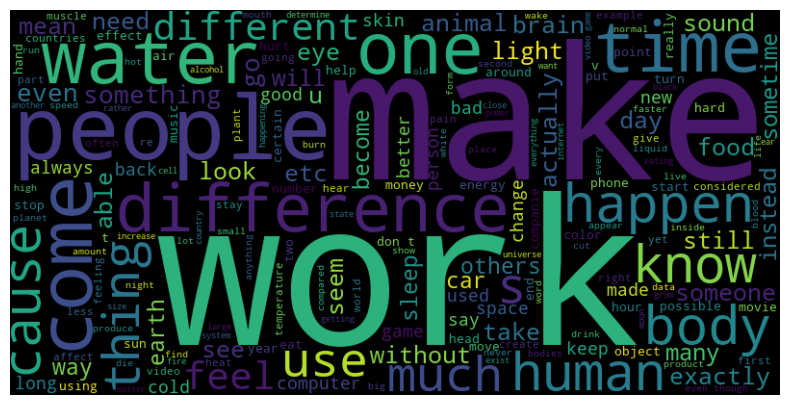

In [53]:
all_texts = ' '.join([item['title'] for item in json_data if 'title' in item])
wordcloud = WordCloud(width=800, height=400).generate(all_texts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [54]:
## the function of removing stopwords
def remove_stopwords(text):
    # Tokenize the text
    words = word_tokenize(text)
    
    # Load English stopwords
    stop_words = set(stopwords.words('english'))
    
    # Filter out stopwords from the tokenized words list (convert to lowercase)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    
    # Return the cleaned text
    return ' '.join(filtered_words)

In [60]:
## remove stopwords from titles

for item in json_data:
    if 'title' in item:  # Check if the key exists
        item['title_clean'] = remove_stopwords(item['title'])

In [77]:
## remove stopwords from answers

clean_text = []
for item in json_data:
    if 'answers' in item:
        texts = item['answers']['text']
        clean_answer_text = [remove_stopwords(text) for text in texts]
        answer_len_text = [len(text) for text in texts]
        answer_len_text_clean = [len(clean_text) for clean_text in clean_answer_text]
                
        item['answers']['text_clean'] = clean_answer_text
        item['answers']['text_len'] = answer_len_text
        item['answers']['text_len_clean'] = answer_len_text_clean
                
        clean_text.extend(clean_answer_text)

### Title stop words after cleaning 

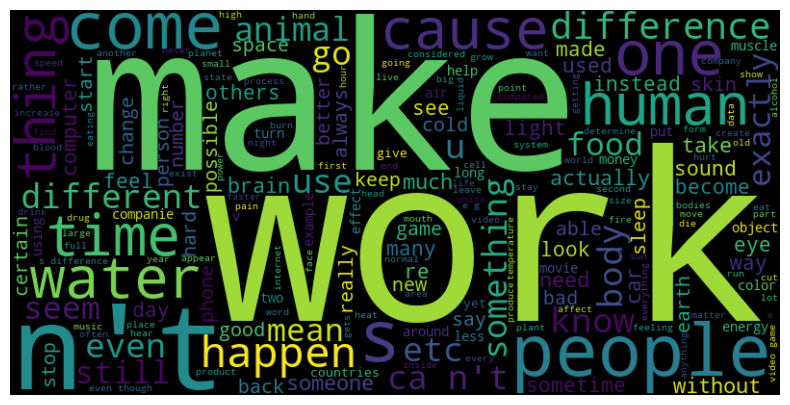

In [78]:
all_texts = ' '.join([item['title_clean'] for item in json_data if 'title_clean' in item])
wordcloud = WordCloud(width=800, height=400).generate(all_texts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Answers stop words after cleaning 

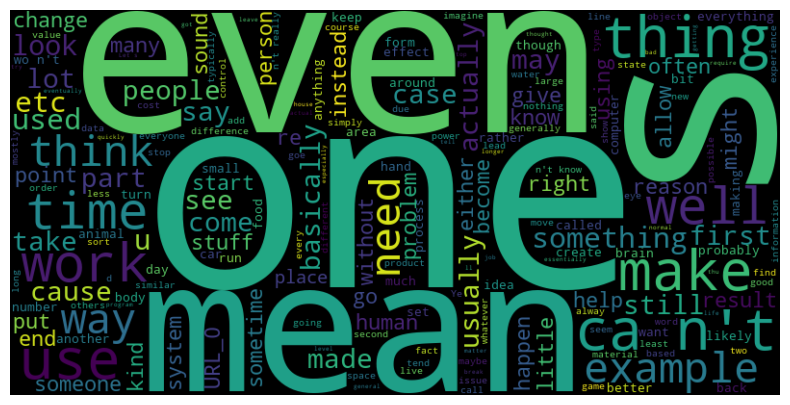

In [79]:
all_texts = ' '.join([item for item in clean_text])

wordcloud = WordCloud(width=800, height=400).generate(all_texts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [83]:
json_data[0]

{'q_id': '5lchat',
 'title': "Why there was a 'leap second' added to the end of 2016?",
 'selftext': '',
 'category': 'Other',
 'subreddit': 'explainlikeimfive',
 'answers': {'a_id': ['dbuoyxl', 'dbur7gi', 'dbuotht'],
  'text': ['the rotation of the earth is not a constant. in fact the rotation of the earth is slowing down, which means that a full day is getting slightly longer. without leap seconds our clocks would slowly drift ever so slightly out of sync with the actual day. we could deal with this by redefining how how long 1 second is, making it slightly longer so that one day is still exactly 24*60*60 seconds. but in practice that is really inconvenient for a lot of our technology which relies on very precise timing. its easier to just move us ahead one second every couple of years or so.',
   "The Earth's rotation is not regular. It varies a bit, so sometimes we add a second. We do this to ensure that noon is always going to be sometime around mid-day. If we did not add leap sec

In [124]:
import pandas as pd

questions = []
for item in json_data:
    question_id = item.get('q_id')
    title = item.get('title')
    selftext = item.get('selftext')
    category = item.get('category')
    answers = item.get('answers')
    title_clean = item.get('title_clean')
    if isinstance(answers, list):
        for answer in answers:
            if isinstance(answer, dict):
                answer_id = answer.get('a_id')
                answer_text = answer.get('text')
                score = answer.get('score')
                questions.append({
                    'question_id': question_id,
                    'title': title,
                    'title_len': len(title),
                    'title_clean': answer.get('title_clean'),
                    'title_clean_len': len(answer.get('title_clean')),
                    'selftext': selftext,
                    'category': category,
                    'answer_id': answer_id,
                    'answer_text': answer_text,
                    'answer_clean': answer_text_clean,
                    'score': score,
                    'number_answer': len(score),
                    'answer_text_len': answer.get('text_len'),
                    'answer_text_clean': answer.get('text_len_clean'),
                })
    elif isinstance(answers, dict):
        answer_id = answers.get('a_id')
        answer_text = answers.get('text')
        answer_text_clean = answers.get('text_clean')
        score = answers.get('score')
        questions.append({
                   'question_id': question_id,
                    'title': title,
                    'title_len': len(title),
                    'title_clean': title_clean,
                    'title_clean_len': len(title_clean),
                    'selftext': selftext,
                    'category': category,
                    'answer_id': answer_id,
                    'answer_text': answer_text,
                    'answer_clean': answer_text_clean,
                    'score': score,
                    'number_answer': len(score),
                    'answer_text_len': answers.get('text_len'),
                    'answer_text_clean': answers.get('text_len_clean'),
        })

df = pd.DataFrame(questions)

In [125]:
df.head(5)

question_id                                              title  title_len  \
0      5lchat  Why there was a 'leap second' added to the end...         55   
1      5lcjq6                How do you claim undiscovered land?         35   
2      5lcl43  Why do we fail to do realistic human CGI (like...        125   
3      5lcr1h  Why is it that we calm down when we take a dee...         93   
4      5lcsyf  Why does 1080p on a 4k TV look better than 108...         63   

                                         title_clean  title_clean_len  \
0                    'leap second ' added end 2016 ?               31   
1                          claim undiscovered land ?               25   
2  fail realistic human CGI ( like SW Rouge One )...               93   
3      calm take deep breath , hold seconds exhale ?               45   
4           1080p 4k TV look better 1080p 1080p TV ?               40   

                                            selftext    category  \
0                                                          Other   
1  If your on a boat, sailing through lets say th...       Other   
2  Title pretty much, thanks for answers in advance!  Technology   
3                                                        Biology   
4                                                     Technology   

                              answer_id  \
0           [dbuoyxl, dbur7gi, dbuotht]   
1           [dbuplm8, dbuocvb, dbux9vf]   
2  [dbuns7l, dbunw2c, dbup34d, dbuo2f1]   
3                             [dbuusst]   
4                    [dbuq0qt, dbuqstj]   

                                         answer_text  \
0  [the rotation of the earth is not a constant. ...   
1  [Imagine you are out walking in the woods near...   
2  [It's more that we're really good at picking u...   
3  [Anxiety/stress are the result of your sympath...   
4  [In a 1080p screen each pixel is represented b...   

                                        answer_clean           score  \
0  [rotation earth constant . fact rotation earth...      [44, 5, 4]   
1  [Imagine walking woods near house find cave . ...    [195, 39, 5]   
2  ['s 're really good picking subtle mistakes hu...  [34, 11, 7, 7]   
3  [Anxiety/stress result sympathetic nervous sys...             [8]   
4  [1080p screen pixel represented four individua...          [9, 4]   

   number_answer      answer_text_len   answer_text_clean  
0              3     [575, 1487, 601]    [402, 1003, 423]  
1              3     [2642, 199, 524]    [1750, 129, 378]  
2              4  [155, 388, 54, 127]  [102, 248, 32, 82]  
3              1               [1006]               [796]  
4              2           [638, 351]          [406, 252]

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91772 entries, 0 to 91771
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   question_id        91772 non-null  object
 1   title              91772 non-null  object
 2   title_len          91772 non-null  int64 
 3   title_clean        91772 non-null  object
 4   title_clean_len    91772 non-null  int64 
 5   selftext           91772 non-null  object
 6   category           91772 non-null  object
 7   answer_id          91772 non-null  object
 8   answer_text        91772 non-null  object
 9   answer_clean       91772 non-null  object
 10  score              91772 non-null  object
 11  number_answer      91772 non-null  int64 
 12  answer_text_len    91772 non-null  object
 13  answer_text_clean  91772 non-null  object
dtypes: int64(3), object(11)
memory usage: 9.8+ MB


In [127]:
df.describe()

title_len  title_clean_len  number_answer
count  91772.000000     91772.000000   91772.000000
mean      83.386349        56.416140       2.441801
std       45.868069        32.175282       3.239174
min        3.000000         0.000000       1.000000
25%       51.000000        33.000000       1.000000
50%       74.000000        49.000000       2.000000
75%      106.000000        72.000000       3.000000
max      299.000000       254.000000     489.000000

#### Titles, on average, have 83 characters, which reduce to 56 characters after stopwords are removed.  The number of answers per question varies widely, with a few questions receiving a significantly higher number of answers (up to 489). The majority of questions (75%) receive 3 or fewer answers.

## Title

### Title length distribution before and after removing stopwords

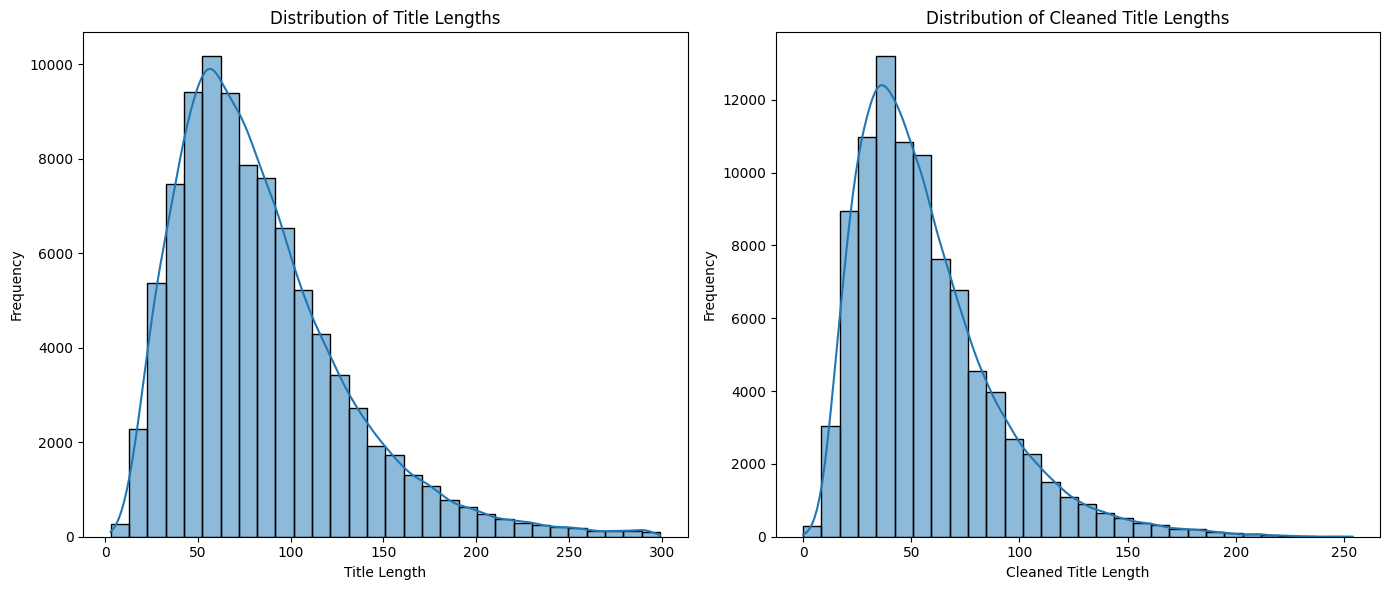

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Distribution of title lengths
sns.histplot(df['title_len'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Title Lengths')
axes[0].set_xlabel('Title Length')
axes[0].set_ylabel('Frequency')

# Distribution of cleaned title lengths
sns.histplot(df['title_clean_len'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Cleaned Title Lengths')
axes[1].set_xlabel('Cleaned Title Length')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

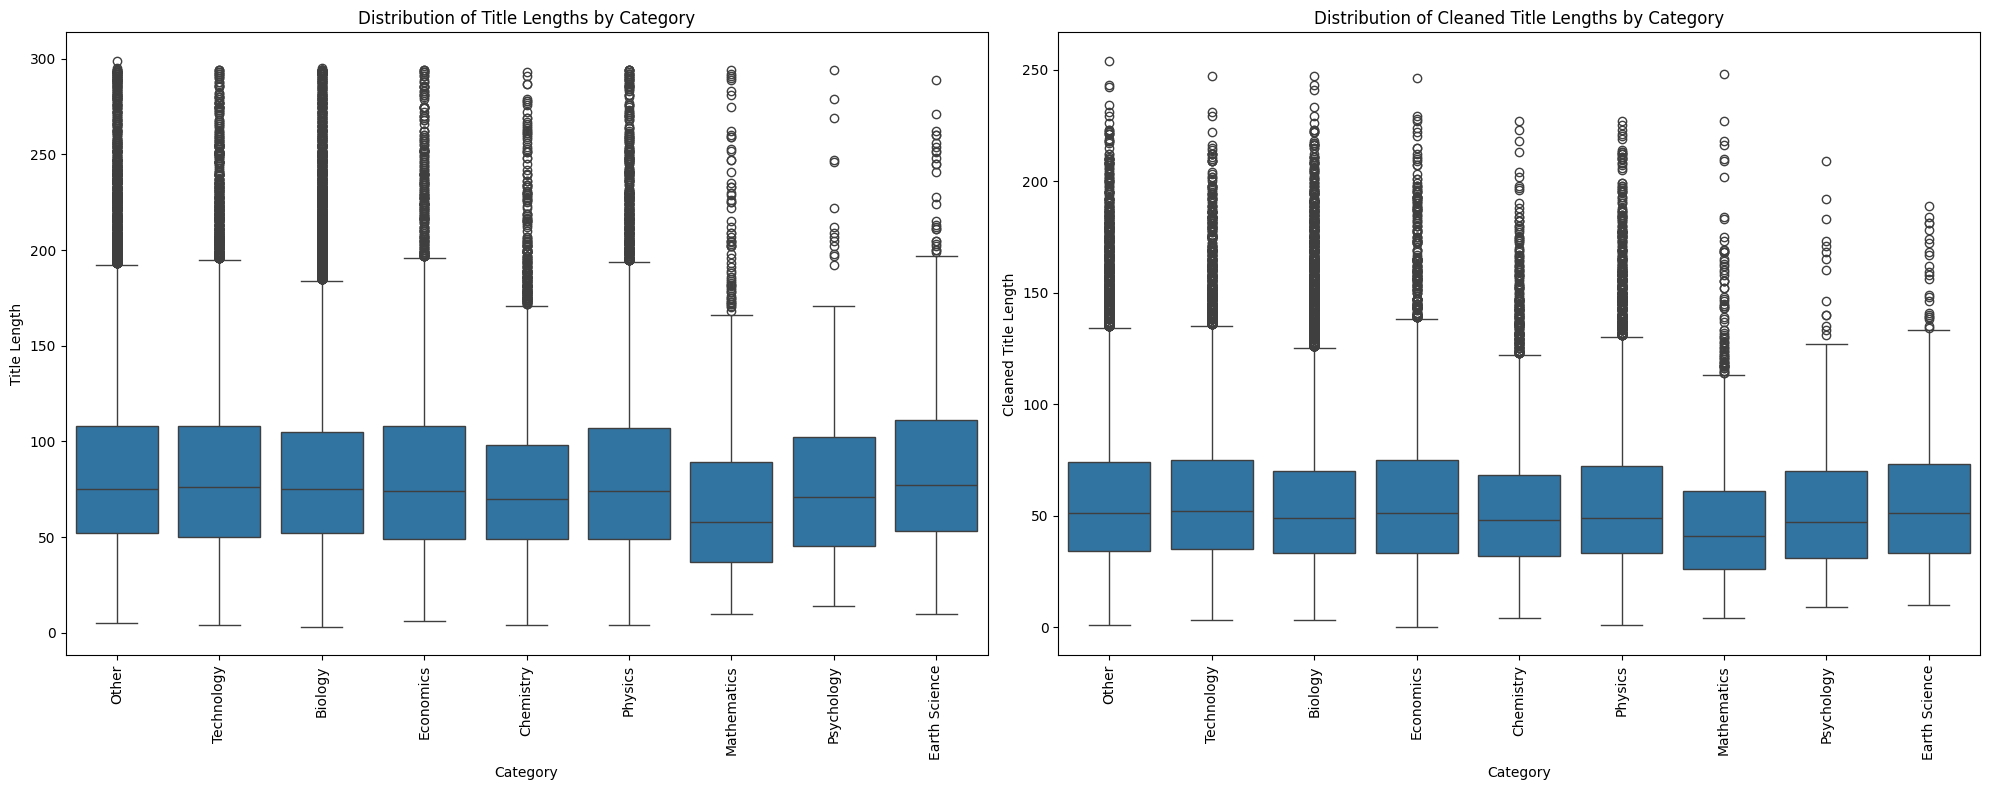

In [132]:
# Create a figure and two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Distribution of title lengths by category
sns.boxplot(x='category', y='title_len', data=df, ax=axes[0])
axes[0].set_title('Distribution of Title Lengths by Category')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Title Length')
axes[0].tick_params(axis='x', rotation=90)

# Distribution of cleaned title lengths by category
sns.boxplot(x='category', y='title_clean_len', data=df, ax=axes[1])
axes[1].set_title('Distribution of Cleaned Title Lengths by Category')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Cleaned Title Length')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()


### We have a side by side comparison on length of the titles before and after cleaning for each category

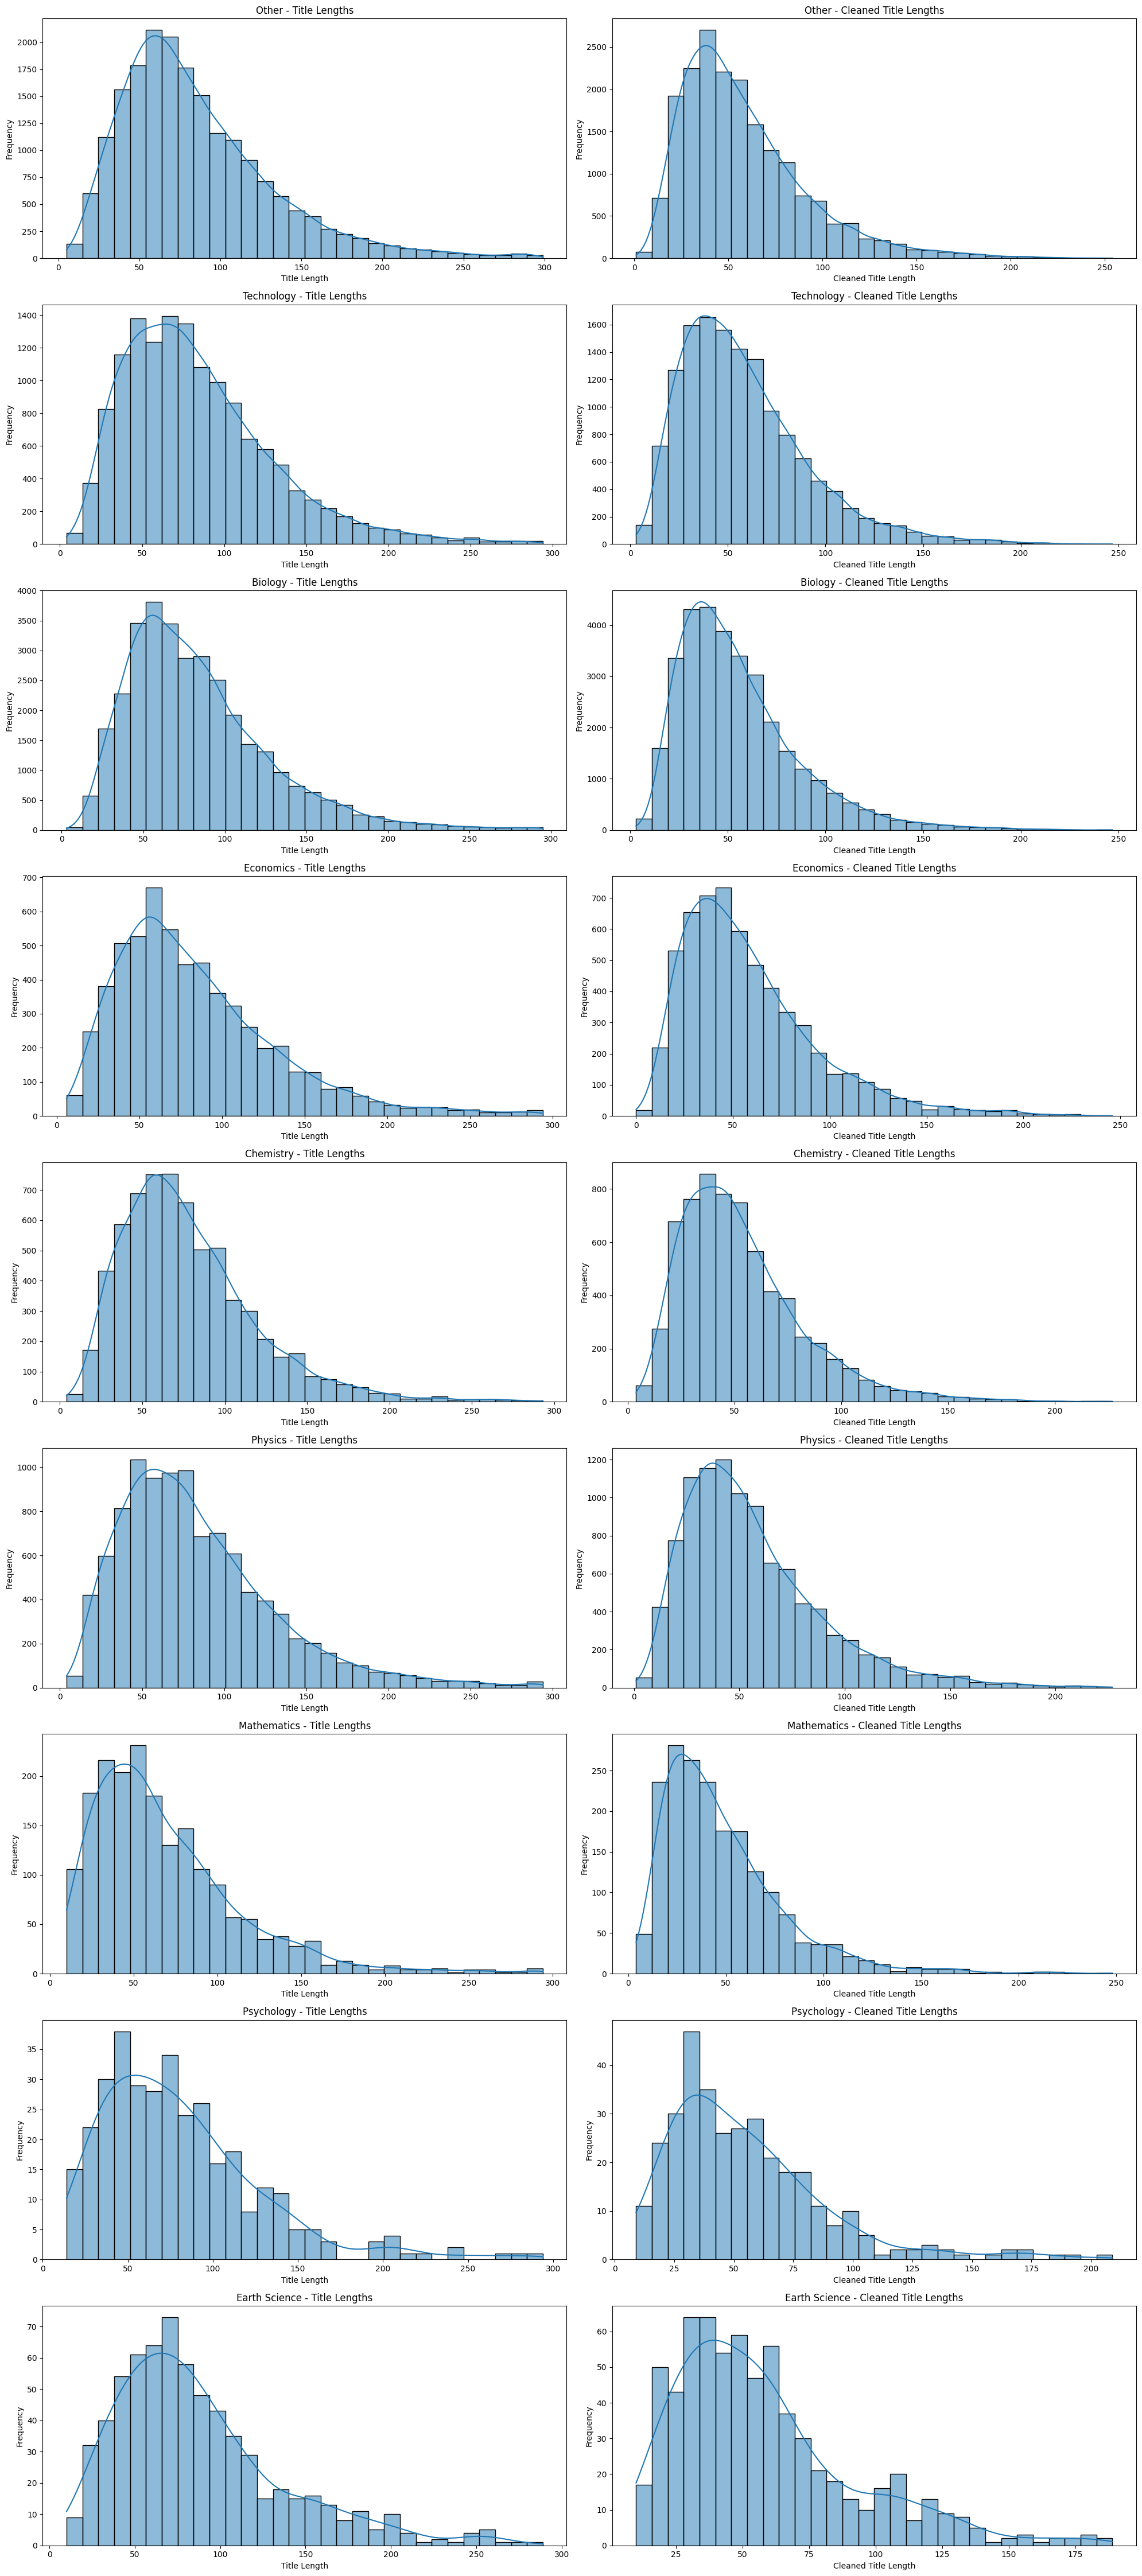

In [135]:
categories = df['category'].unique()

# Calculate the number of rows needed for subplots
n_categories = len(categories)
n_cols = 2  # Two columns: one for title_len and one for title_clean_len
n_rows = n_categories  # Calculate rows needed

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through categories and create histograms
for idx, category in enumerate(categories):
    category_data = df[df['category'] == category]
    
    # Histogram for title lengths
    sns.histplot(category_data['title_len'], bins=30, kde=True, ax=axes[idx * 2])
    axes[idx * 2].set_title(f'{category} - Title Lengths')
    axes[idx * 2].set_xlabel('Title Length')
    axes[idx * 2].set_ylabel('Frequency')
    
    # Histogram for cleaned title lengths
    sns.histplot(category_data['title_clean_len'], bins=30, kde=True, ax=axes[idx * 2 + 1])
    axes[idx * 2 + 1].set_title(f'{category} - Cleaned Title Lengths')
    axes[idx * 2 + 1].set_xlabel('Cleaned Title Length')
    axes[idx * 2 + 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

## Answers

### Number of Answers

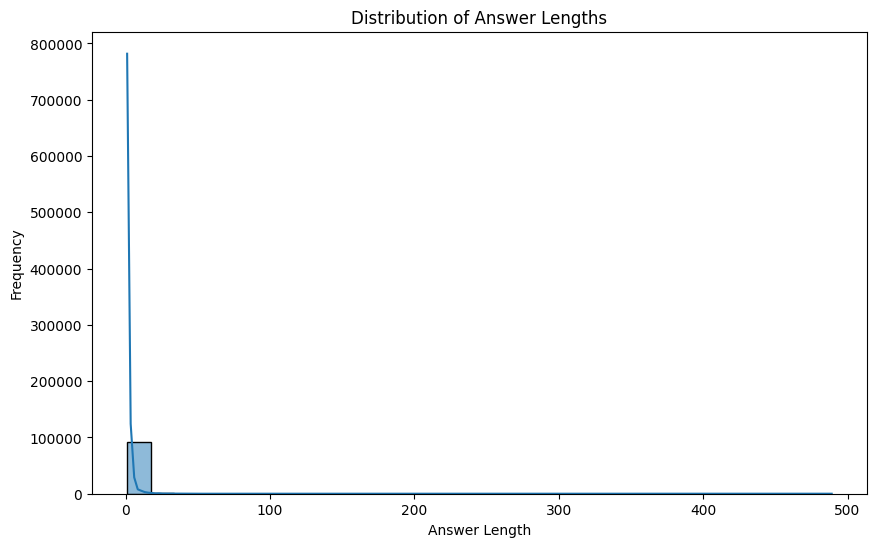

In [151]:
# Distribution of answer lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['number_answer'], bins=30, kde=True)
plt.title('Distribution of Answer Lengths')
plt.xlabel('Answer Length')
plt.ylabel('Frequency')
plt.show()

In [157]:
len(df[df['number_answer'] > 20]), len(df), 364/91772*100

(364, 91772, 0.3966351392581616)

### From above diagram we can not understand any information, we need to remove less than 0.4% of our records (364) as outliers to have better understanding of number of answers

In [161]:
df_clean = df[df['number_answer'] < 20]

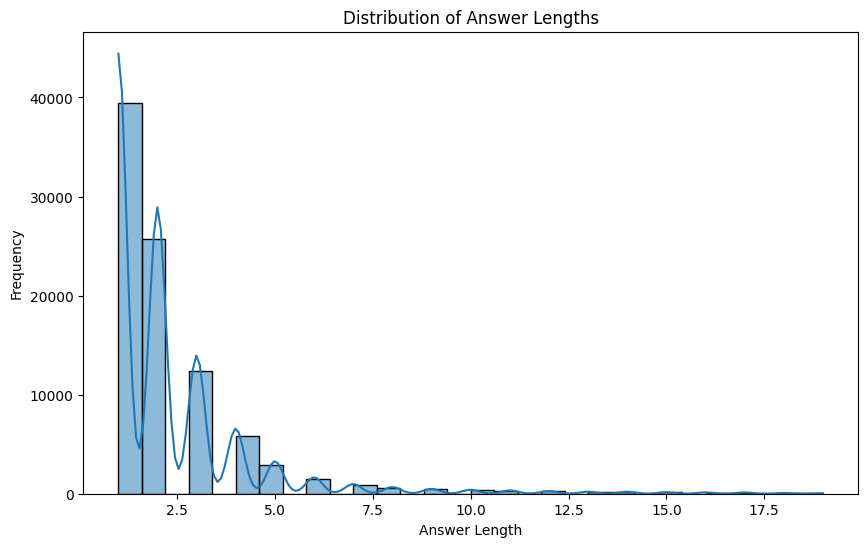

In [162]:
##  Distribution of answer lengths
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['number_answer'], bins=30, kde=True)
plt.title('Distribution of Answer Lengths')
plt.xlabel('Answer Length')
plt.ylabel('Frequency')
plt.show()

#### As you can see right now we have the better diagram

### Number of Answers Histogram

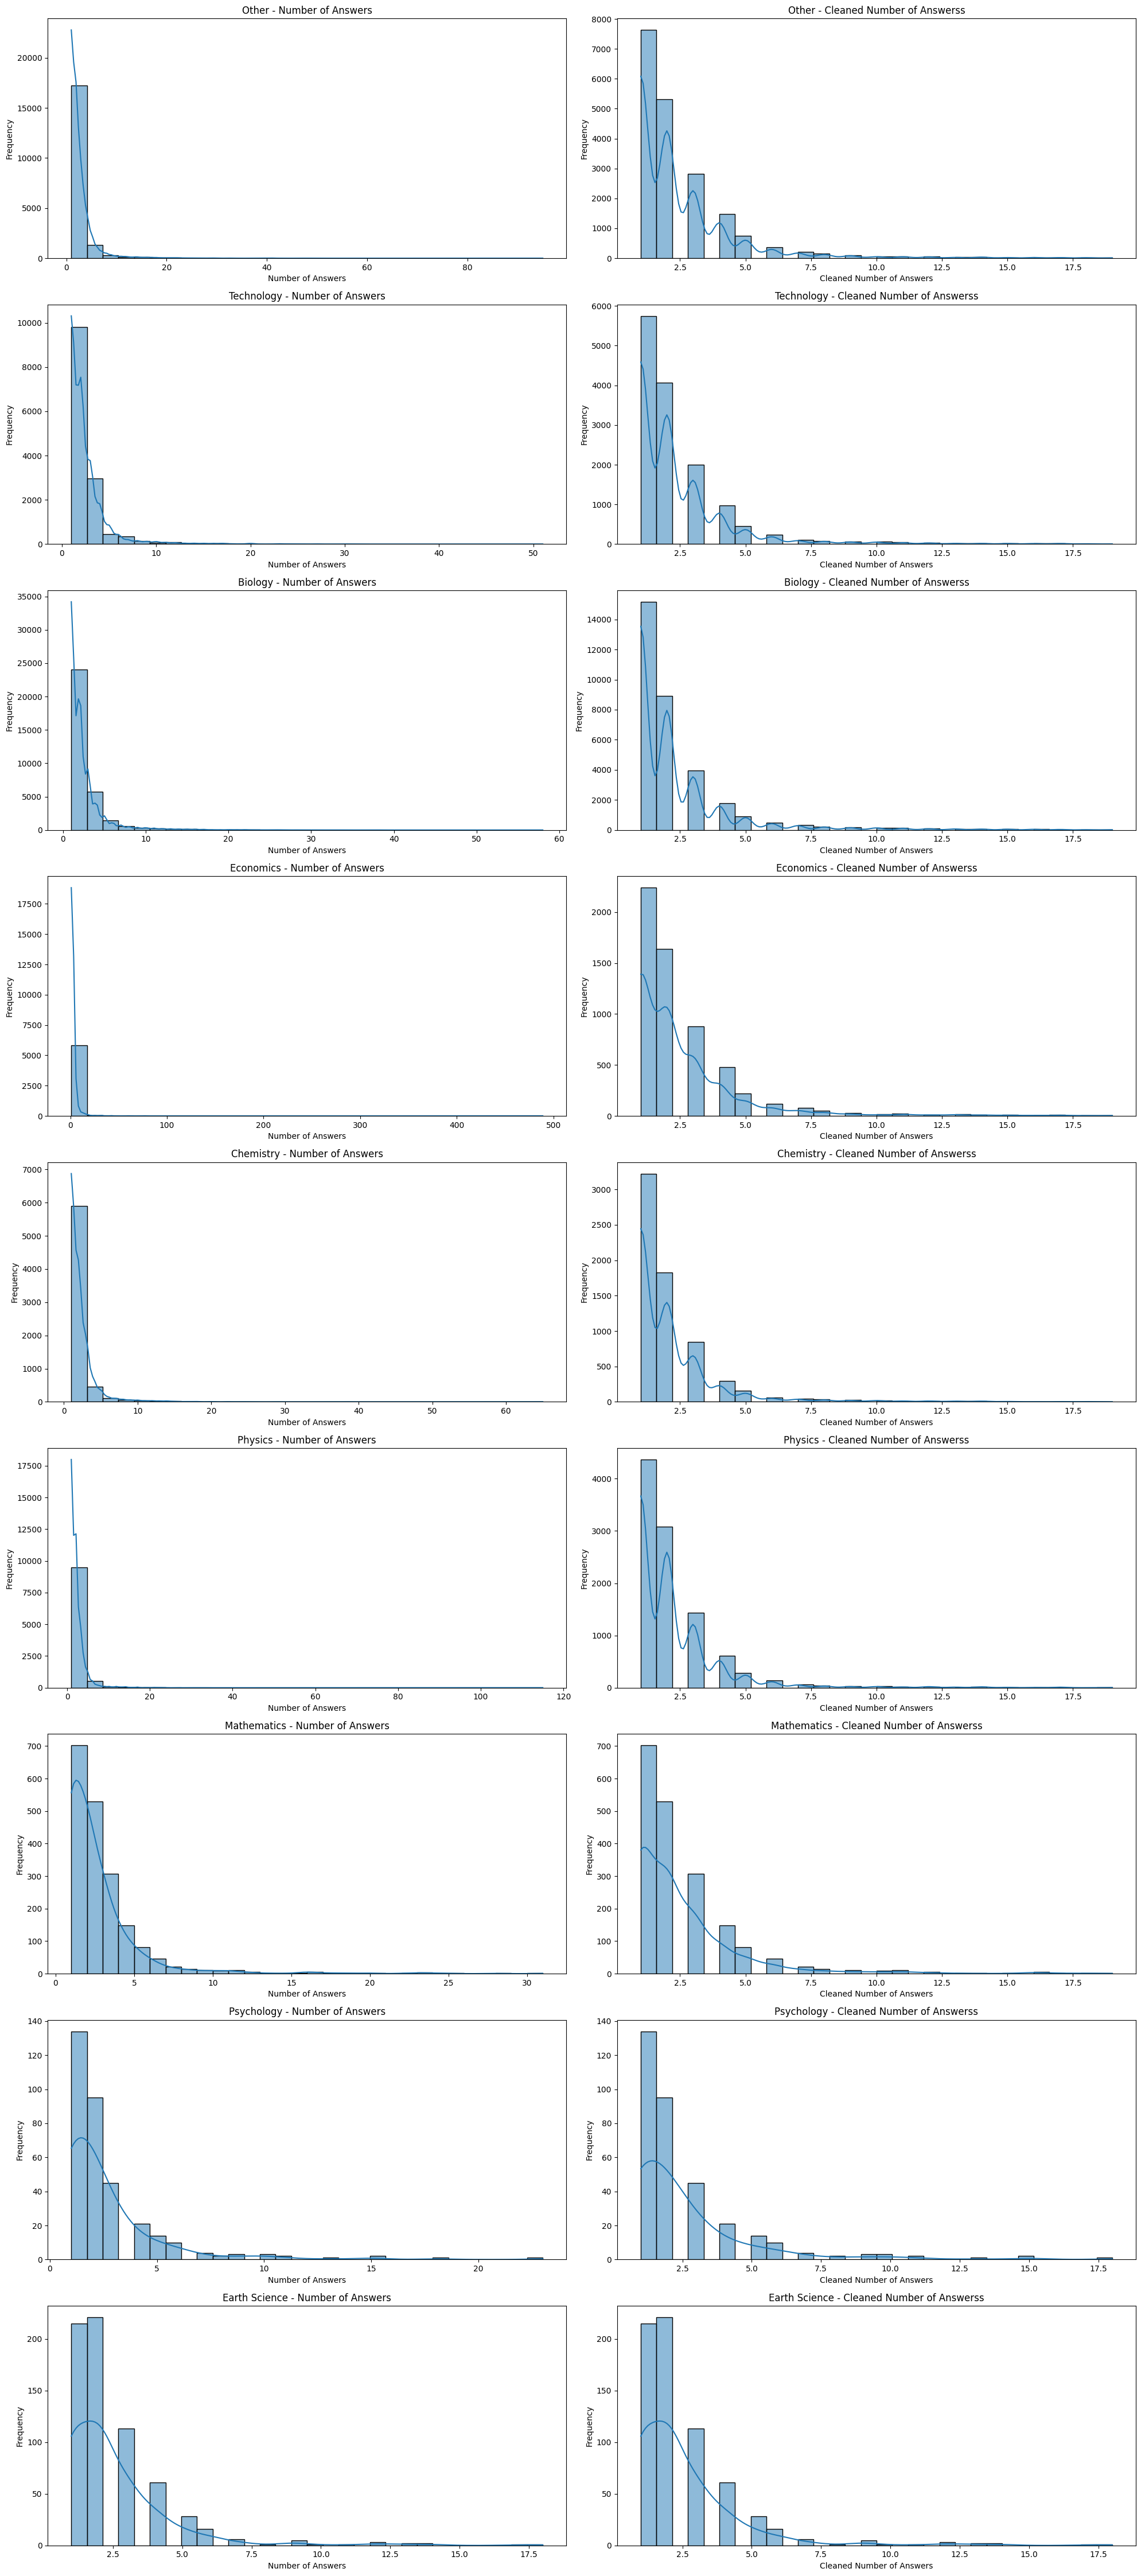

In [165]:
categories = df['category'].unique()

n_categories = len(categories)
n_cols = 2 
n_rows = n_categories  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

axes = axes.flatten()

for idx, category in enumerate(categories):
    category_data = df[df['category'] == category]
    category_data_clean = df_clean[df_clean['category'] == category]

    
    sns.histplot(category_data['number_answer'], bins=30, kde=True, ax=axes[idx * 2])
    axes[idx * 2].set_title(f'{category} - Number of Answers')
    axes[idx * 2].set_xlabel('Number of Answers')
    axes[idx * 2].set_ylabel('Frequency')
    
    sns.histplot(category_data_clean['number_answer'], bins=30, kde=True, ax=axes[idx * 2 + 1])
    axes[idx * 2 + 1].set_title(f'{category} - Cleaned Number of Answerss')
    axes[idx * 2 + 1].set_xlabel('Cleaned Number of Answers')
    axes[idx * 2 + 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#### In above charts, we have a side by side histogram of number of sample before and after applying 20 samples threshold in all categories.

## Length of Answers

In [167]:
df['total_answer_len'] = [sum(item) for item in df['answer_text_len']]
df['total_answer_len_clean'] = [sum(item) for item in df['answer_text_clean']]

In [174]:
df[['total_answer_len', 'total_answer_len_clean']].describe()

total_answer_len  total_answer_len_clean
count      91772.000000            91772.000000
mean        1483.378819             1027.904895
std         2269.976037             1577.973018
min           37.000000               14.000000
25%          454.000000              313.000000
50%          892.000000              616.000000
75%         1710.000000             1184.000000
max       175910.000000           116743.000000

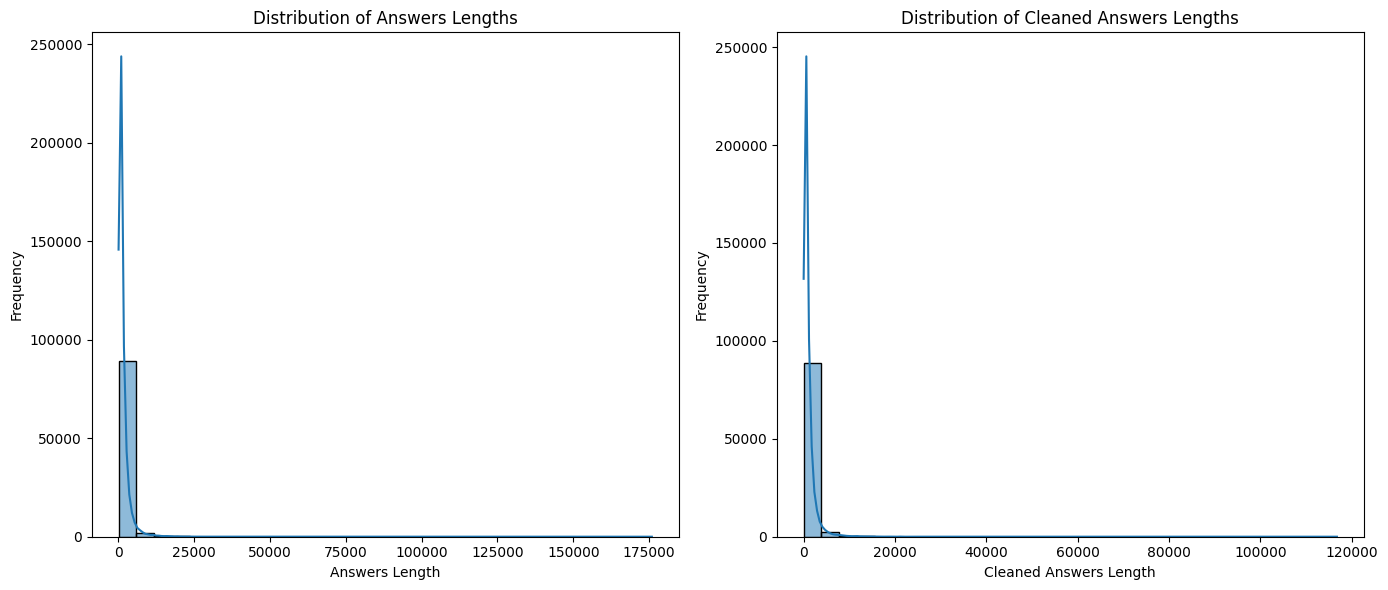

In [173]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df['total_answer_len'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Answers Lengths')
axes[0].set_xlabel('Answers Length')
axes[0].set_ylabel('Frequency')

sns.histplot(df['total_answer_len_clean'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Cleaned Answers Lengths')
axes[1].set_xlabel('Cleaned Answers Length')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

Raw data with less than 3000 answer length: 82091
Clean data with less than 3000 answer length: 86769


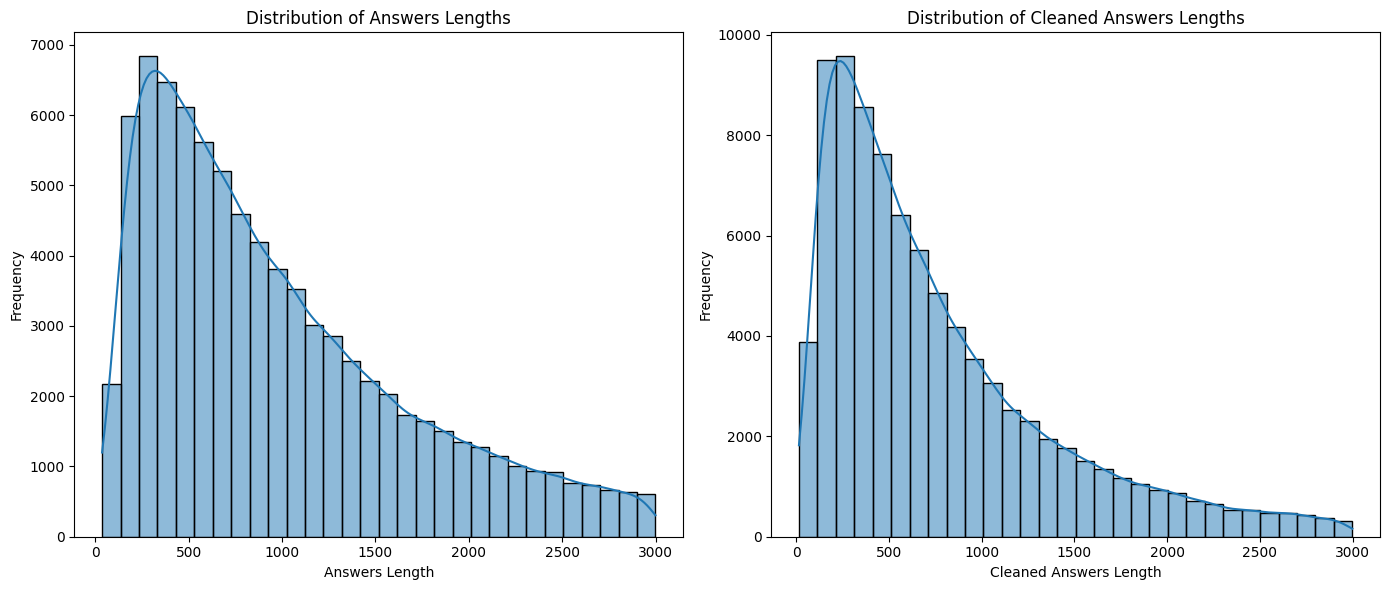

In [176]:
## filter anwsers with length of lower than 3000 for having better understanding of distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

print(f"Raw data with less than 3000 answer length: {len(df[df['total_answer_len'] < 3000])}")
sns.histplot(df[df['total_answer_len'] < 3000]["total_answer_len"], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Answers Lengths')
axes[0].set_xlabel('Answers Length')
axes[0].set_ylabel('Frequency')

print(f"Clean data with less than 3000 answer length: {len(df[df['total_answer_len_clean'] < 3000])}")
sns.histplot(df[df['total_answer_len_clean'] < 3000]["total_answer_len_clean"], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Cleaned Answers Lengths')
axes[1].set_xlabel('Cleaned Answers Length')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#### The above charts indicate that the distribution of clean data has a highest peak in comparison of raw data. In addition, we can see similarity of distributions in having positive values of Skewness.

### Answers length based on Category

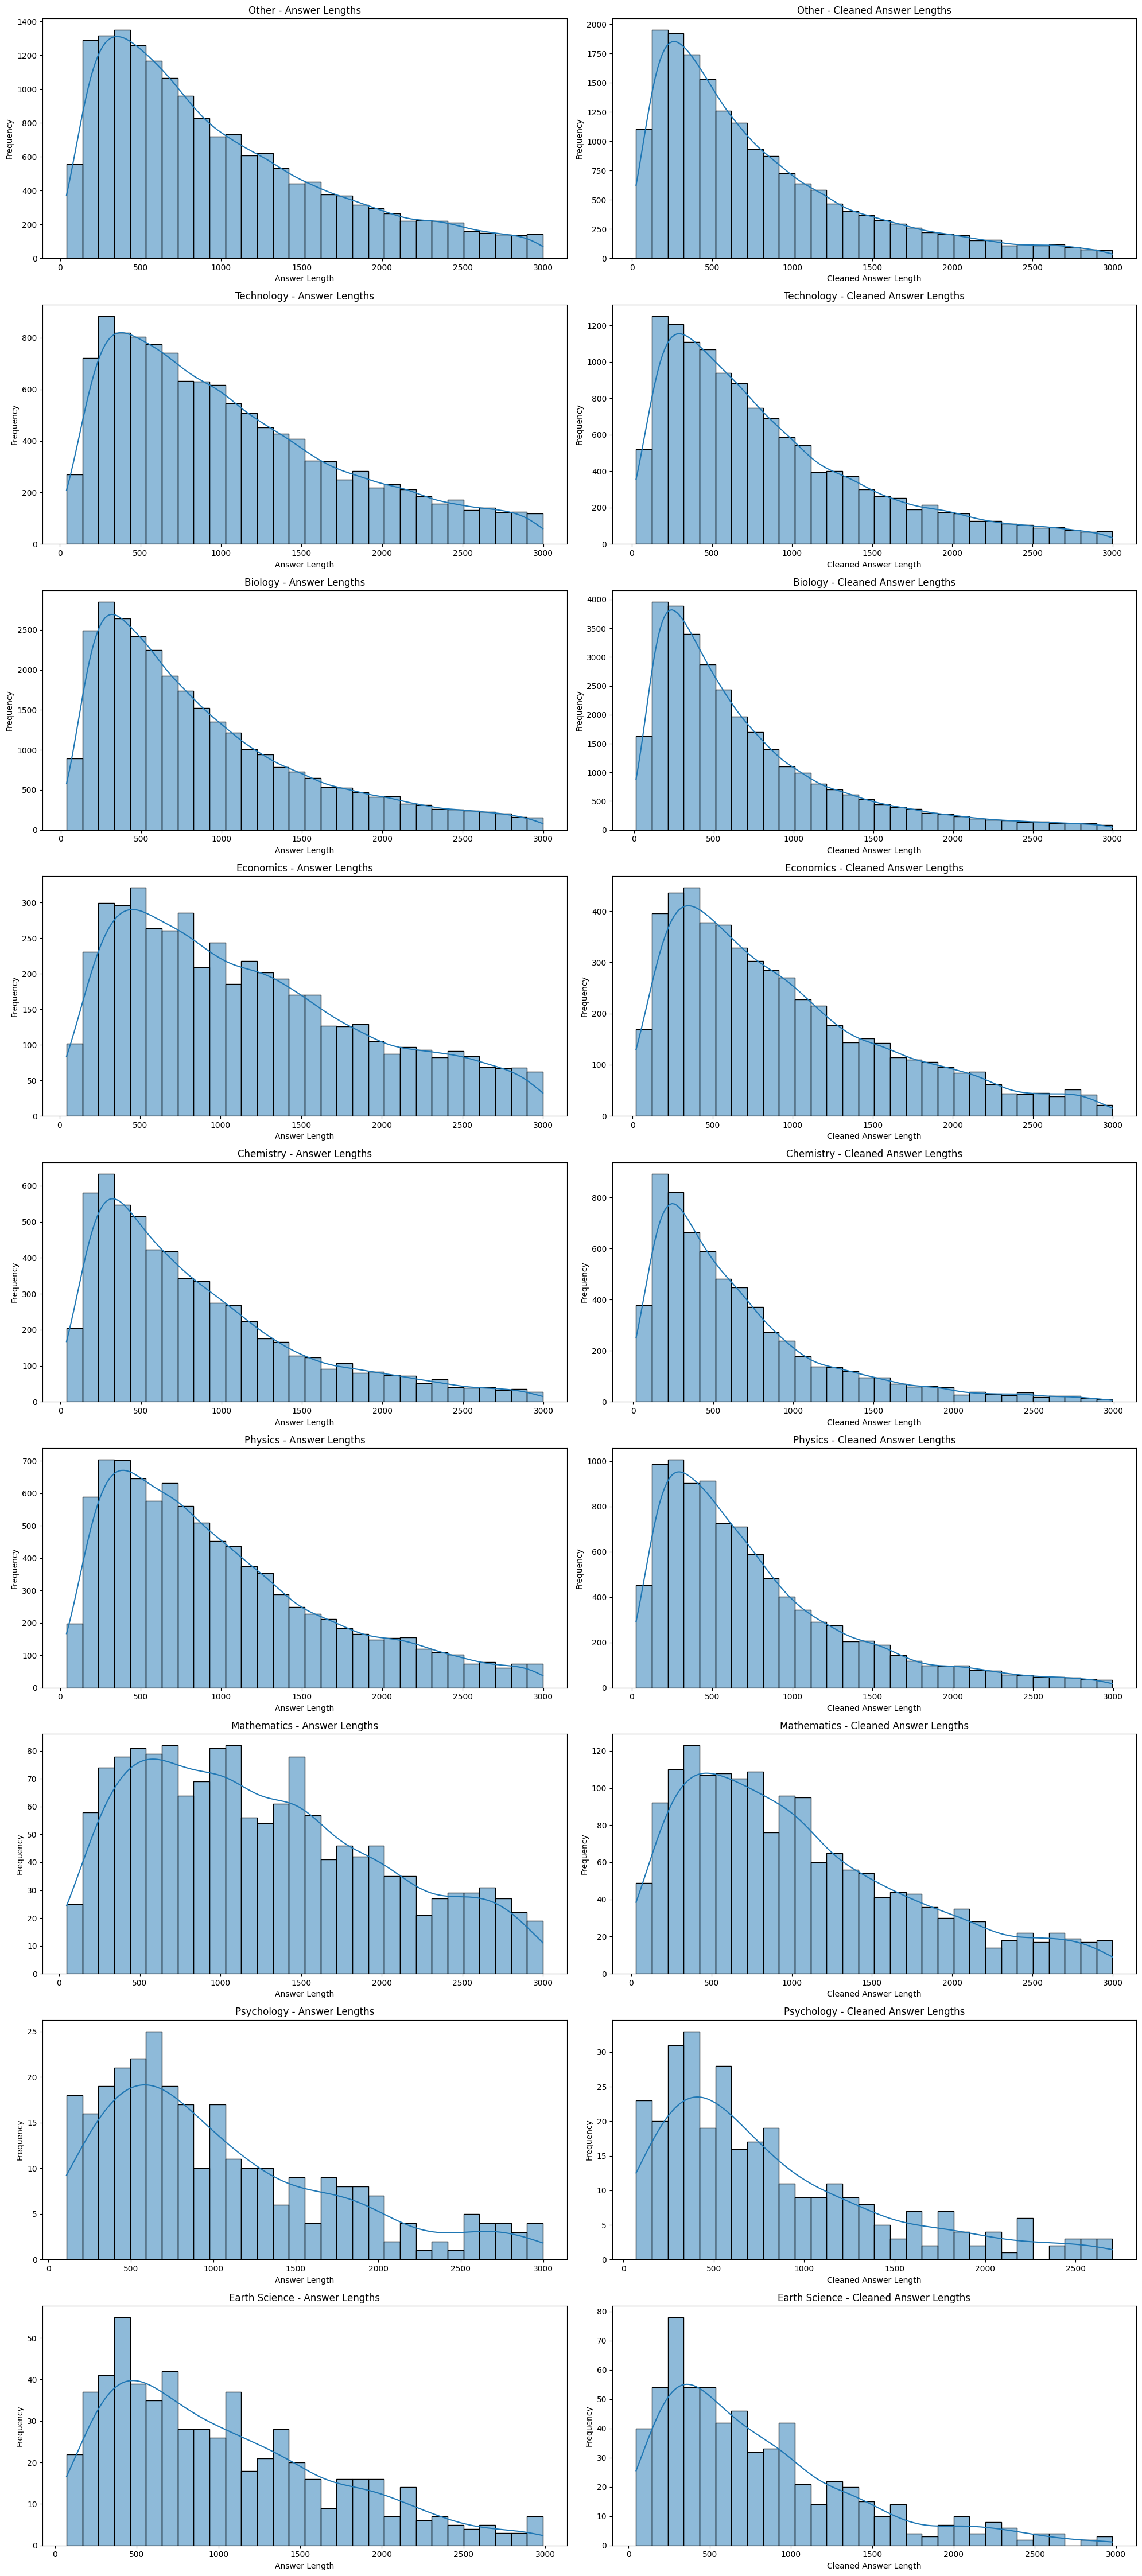

In [177]:
filtered_df_len = df[df['total_answer_len'] < 3000]
filtered_df_clean_len = df[df['total_answer_len_clean'] < 3000]

# Get unique categories
categories = df['category'].unique()

n_categories = len(categories)
n_cols = 2  
n_rows = n_categories  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

axes = axes.flatten()

for idx, category in enumerate(categories):
    category_data_len = filtered_df_len[filtered_df_len['category'] == category]
    category_data_clean_len = filtered_df_clean_len[filtered_df_clean_len['category'] == category]
    
    # Histogram for total answer lengths
    sns.histplot(category_data_len['total_answer_len'], bins=30, kde=True, ax=axes[idx * 2])
    axes[idx * 2].set_title(f'{category} - Answer Lengths')
    axes[idx * 2].set_xlabel('Answer Length')
    axes[idx * 2].set_ylabel('Frequency')
    
    # Histogram for cleaned total answer lengths
    sns.histplot(category_data_clean_len['total_answer_len_clean'], bins=30, kde=True, ax=axes[idx * 2 + 1])
    axes[idx * 2 + 1].set_title(f'{category} - Cleaned Answer Lengths')
    axes[idx * 2 + 1].set_xlabel('Cleaned Answer Length')
    axes[idx * 2 + 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#### The above chart is for distribution of answers length after and before cleaning based on category. You can see impact of cleaning on distribution of answer lengths, the clean data have 20% to 60% higher peak, it is because of cleaning impact to push the data to more informative format and removing unncessary words. Also, in Earth Science, Psychology, and Mathematics, you can see a higher variance of data, the answers length changed less than other categories, it can shows lower number of stop words in these scientific topics.

### Raw Data Violin Plot

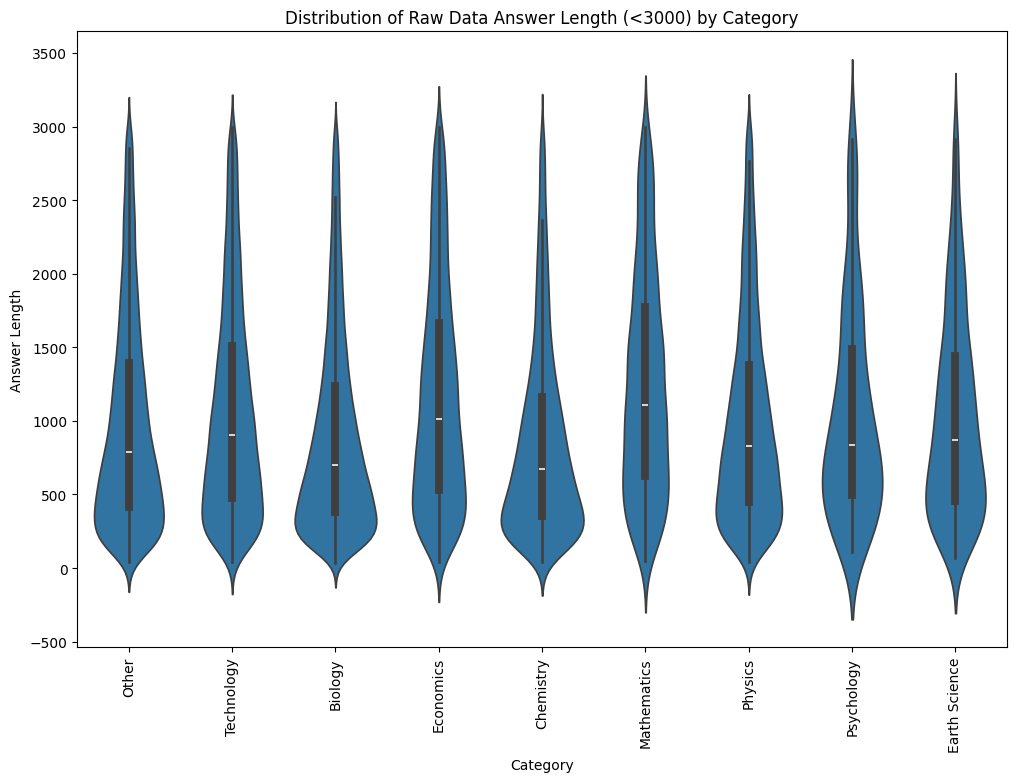

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

# Violin plot for score distribution by category
plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='total_answer_len', data=df[df['total_answer_len'] < 3000])
plt.title('Distribution of Raw Data Answer Length (<3000) by Category')
plt.xlabel('Category')
plt.ylabel('Answer Length')
plt.xticks(rotation=90)
plt.show()

### Clean Data Violin Plot

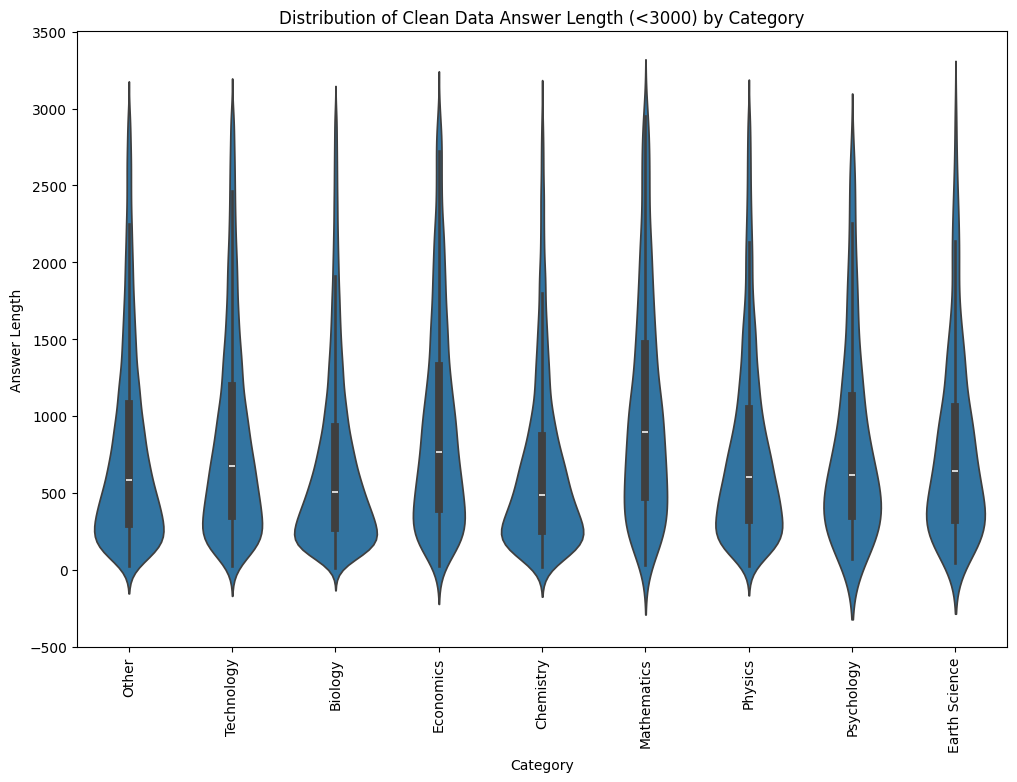

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

# Violin plot for score distribution by category
plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='total_answer_len_clean', data=df[df['total_answer_len_clean'] < 3000])
plt.title('Distribution of Clean Data Answer Length (<3000) by Category')
plt.xlabel('Category')
plt.ylabel('Answer Length')
plt.xticks(rotation=90)
plt.show()

## Score

#### In this section, we want to have more exploration in score feature

In [193]:
## add best score and average score col to the df

In [194]:
df['best_score'] = [max(row) for row in df['score']]
df['avg_score'] = [np.mean(row) for row in df['score']]

In [195]:
df[['best_score', 'avg_score']].describe()

best_score     avg_score
count  91772.000000  91772.000000
mean     171.608192     27.017055
std     1202.051998    130.955772
min        3.000000      3.000000
25%        5.000000      4.500000
50%        8.000000      7.000000
75%       17.000000     11.500000
max    42837.000000   6959.333333

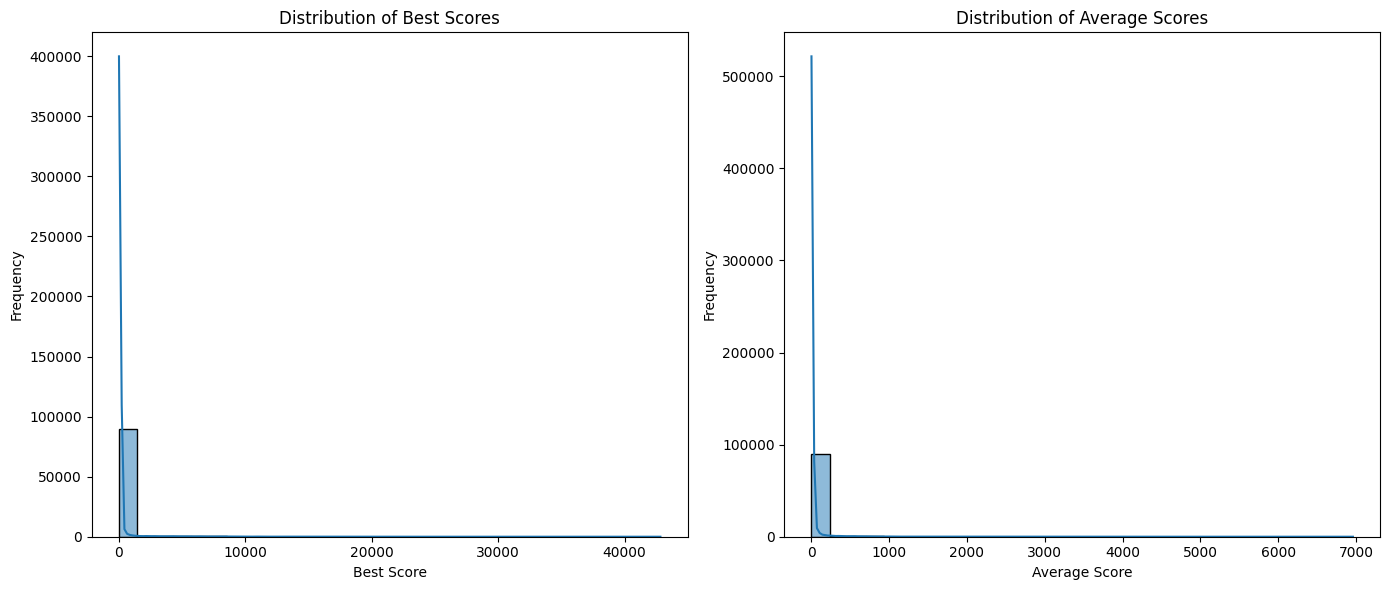

In [196]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df['best_score'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Best Scores')
axes[0].set_xlabel('Best Score')
axes[0].set_ylabel('Frequency')

sns.histplot(df['avg_score'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Average Scores')
axes[1].set_xlabel('Average Score')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

### in above chart, we can see some outliers made the charts uninformative and we should remove them to have better understanding of the socre distributions

In [225]:
## We use 60 for best score threshold to plot the diagrams 
df_clean_score = df[df['best_score'] < 60].copy()

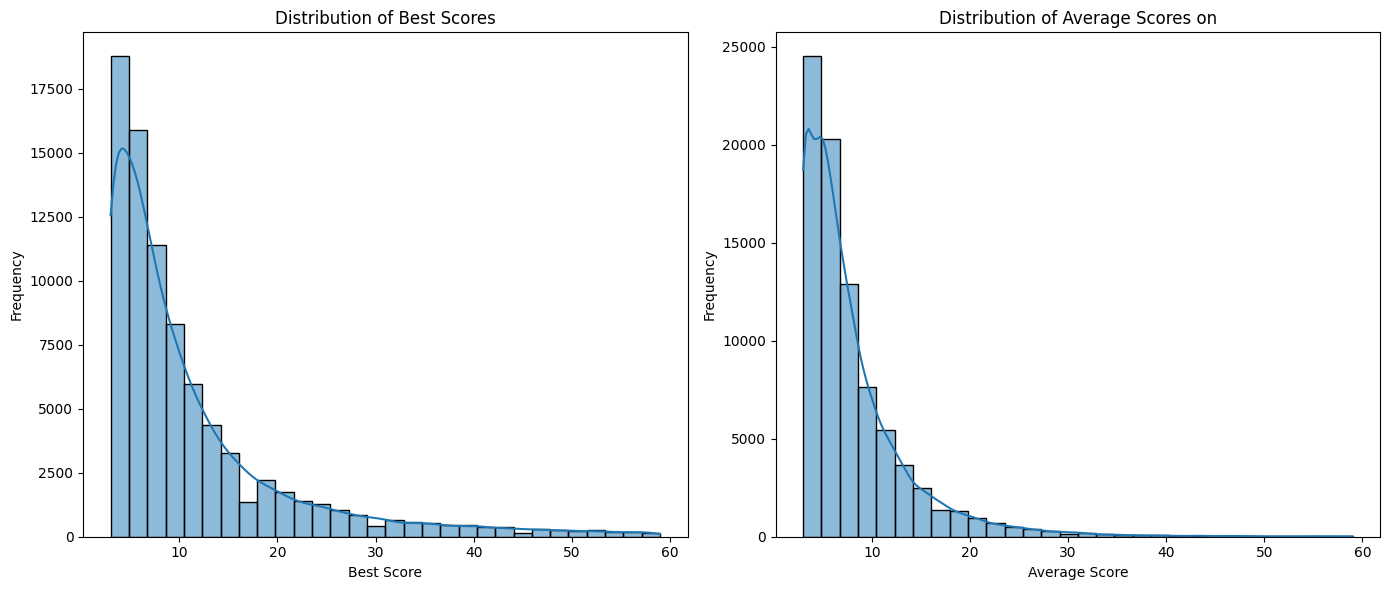

In [227]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df_clean_score['best_score'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Best Scores')
axes[0].set_xlabel('Best Score')
axes[0].set_ylabel('Frequency')

sns.histplot(df_clean_score['avg_score'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Average Scores on')
axes[1].set_xlabel('Average Score')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

### Distribution of best and average score on each category

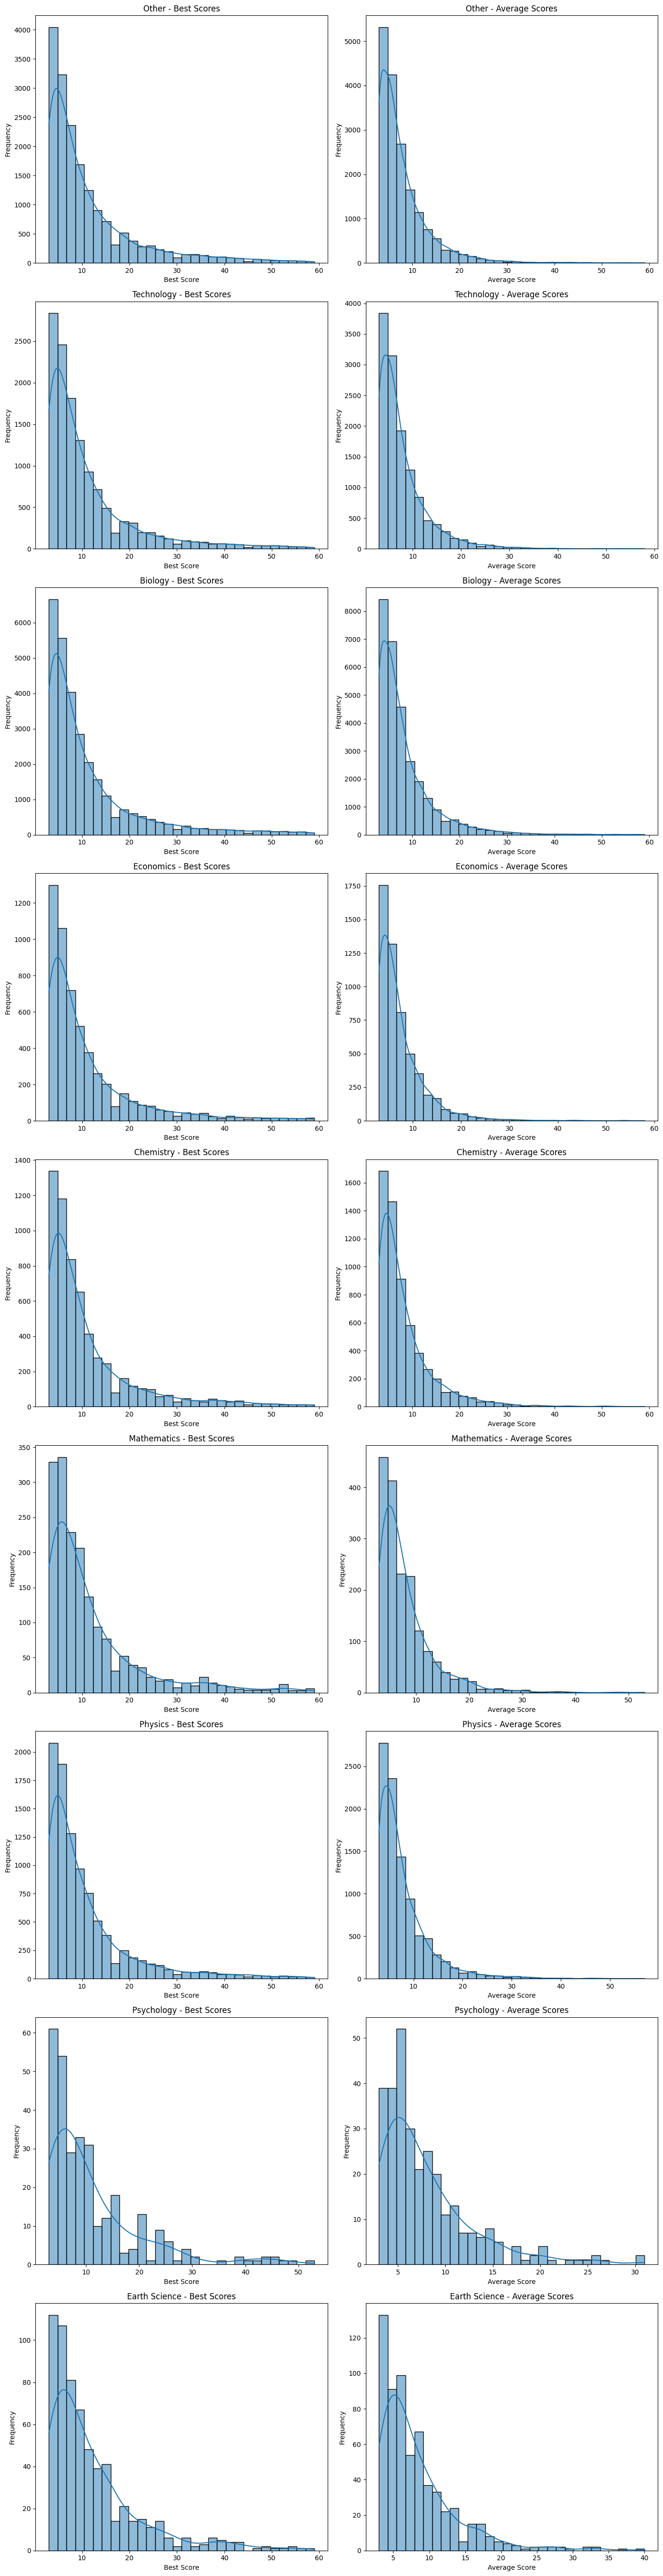

In [230]:
categories = df_clean_score['category'].unique()

n_categories = len(categories)
n_cols = 2  
n_rows = n_categories  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 6))

axes = axes.flatten()

for idx, category in enumerate(categories):
    category_data = df_clean_score[df_clean_score['category'] == category]
    
    # Histogram for best scores
    sns.histplot(category_data['best_score'], bins=30, kde=True, ax=axes[idx * 2])
    axes[idx * 2].set_title(f'{category} - Best Scores')
    axes[idx * 2].set_xlabel('Best Score')
    axes[idx * 2].set_ylabel('Frequency')
    
    # Histogram for average scores
    sns.histplot(category_data['avg_score'], bins=30, kde=True, ax=axes[idx * 2 + 1])
    axes[idx * 2 + 1].set_title(f'{category} - Average Scores')
    axes[idx * 2 + 1].set_xlabel('Average Score')
    axes[idx * 2 + 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


# Correlation based analysis on Score and other features

##  Correlation analysis on Title len before cleaning and best and average score

Correlation between title length and best score: 0.06980802237383099
Correlation between title length and average score: 0.06058376842305786


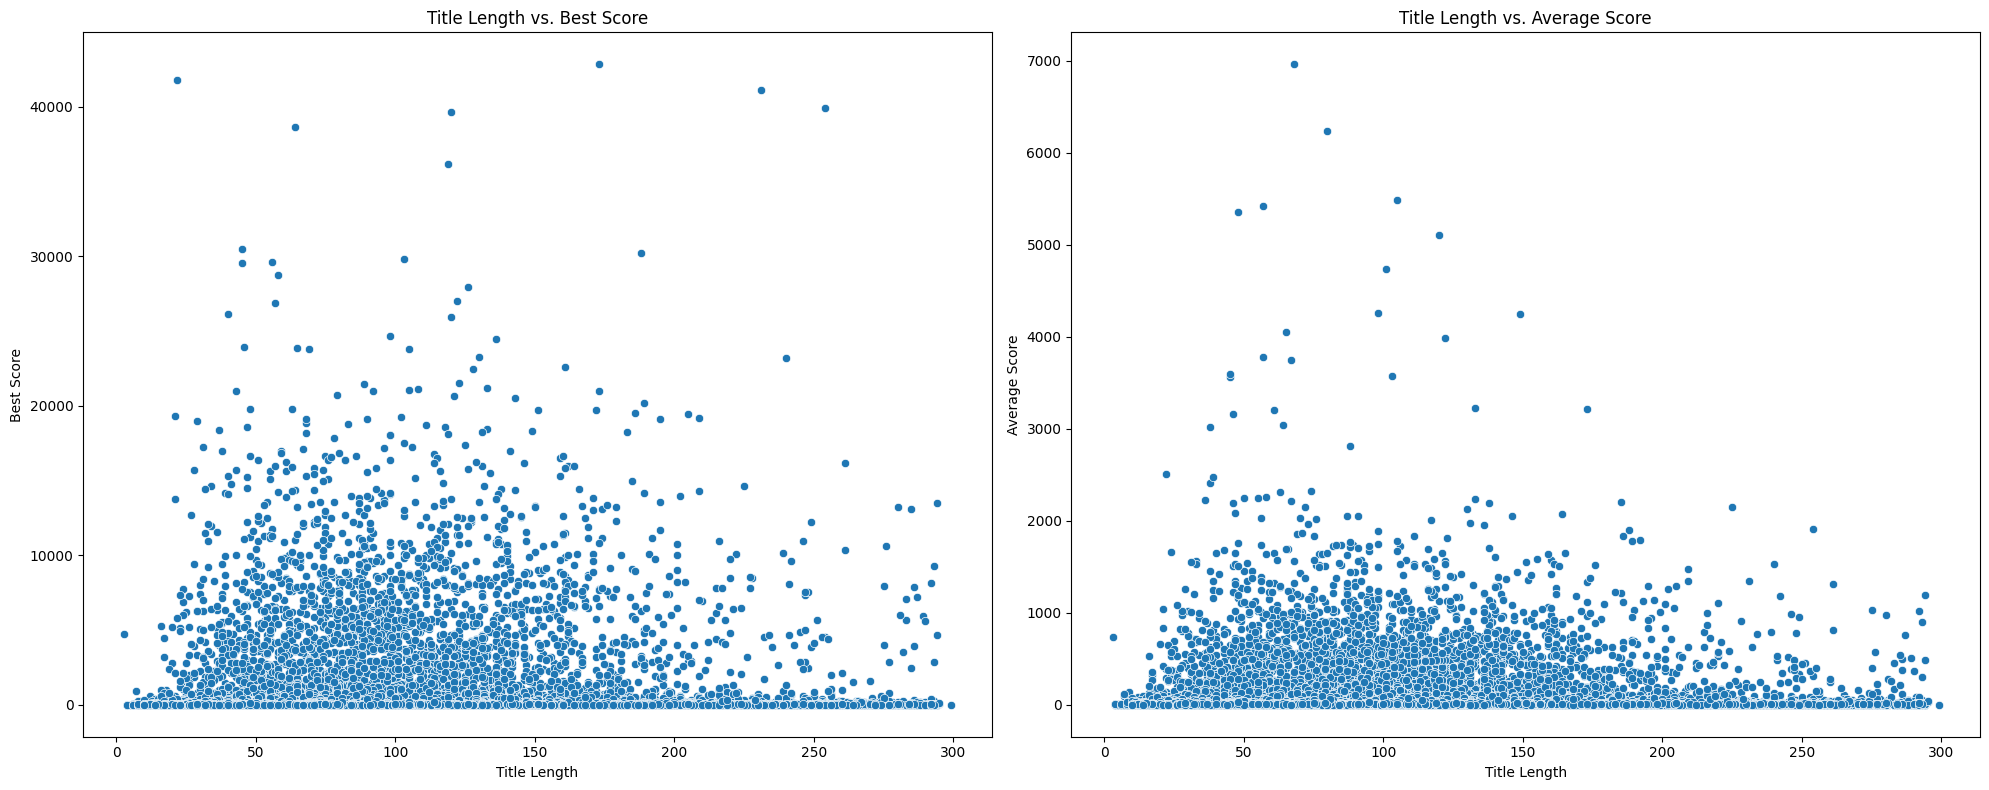

In [234]:
# Calculate correlation coefficients
correlation_best = np.corrcoef(df['title_len'], df['best_score'])[0, 1]
correlation_avg = np.corrcoef(df['title_len'], df['avg_score'])[0, 1]
print(f"Correlation between title length and best score: {correlation_best}")
print(f"Correlation between title length and average score: {correlation_avg}")

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(x='title_len', y='best_score', data=df, ax=axes[0])
axes[0].set_title('Title Length vs. Best Score')
axes[0].set_xlabel('Title Length')
axes[0].set_ylabel('Best Score')

sns.scatterplot(x='title_len', y='avg_score', data=df, ax=axes[1])
axes[1].set_title('Title Length vs. Average Score')
axes[1].set_xlabel('Title Length')
axes[1].set_ylabel('Average Score')

# Adjust layout
plt.tight_layout()
plt.show()


#### We can not see any informative correlation between best or avg score with title len. These are for non clean df based on score

Correlation between title length and best score: 0.07902010300546188
Correlation between title length and average score: 0.05199668664667133


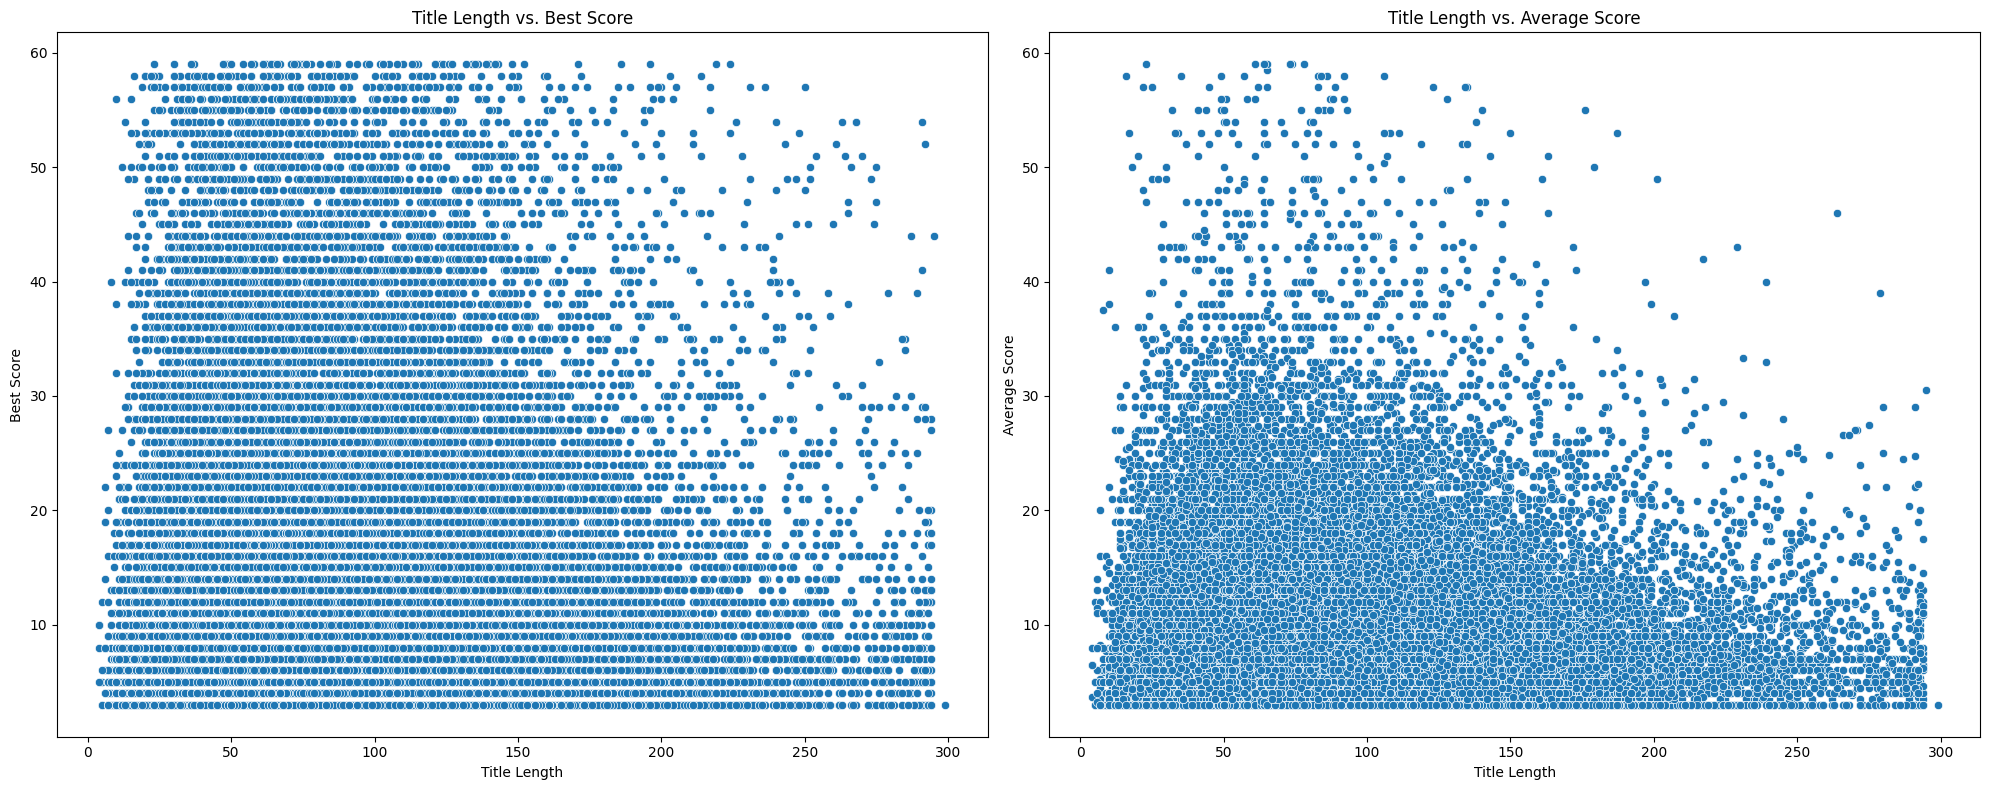

In [236]:
# Calculate correlation coefficients
correlation_best = np.corrcoef(df_clean_score['title_len'], df_clean_score['best_score'])[0, 1]
correlation_avg = np.corrcoef(df_clean_score['title_len'], df_clean_score['avg_score'])[0, 1]
print(f"Correlation between title length and best score: {correlation_best}")
print(f"Correlation between title length and average score: {correlation_avg}")

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(x='title_len', y='best_score', data=df_clean_score, ax=axes[0])
axes[0].set_title('Title Length vs. Best Score')
axes[0].set_xlabel('Title Length')
axes[0].set_ylabel('Best Score')

sns.scatterplot(x='title_len', y='avg_score', data=df_clean_score, ax=axes[1])
axes[1].set_title('Title Length vs. Average Score')
axes[1].set_xlabel('Title Length')
axes[1].set_ylabel('Average Score')

# Adjust layout
plt.tight_layout()
plt.show()


#### We can not see any informative correlation between best or avg score with title len. These are for clean df based on score

##  Correlation analysis on Title len after cleaning and best and average score

Correlation between title length and best score: 0.06753434250364322
Correlation between title length and average score: 0.057119768388693974


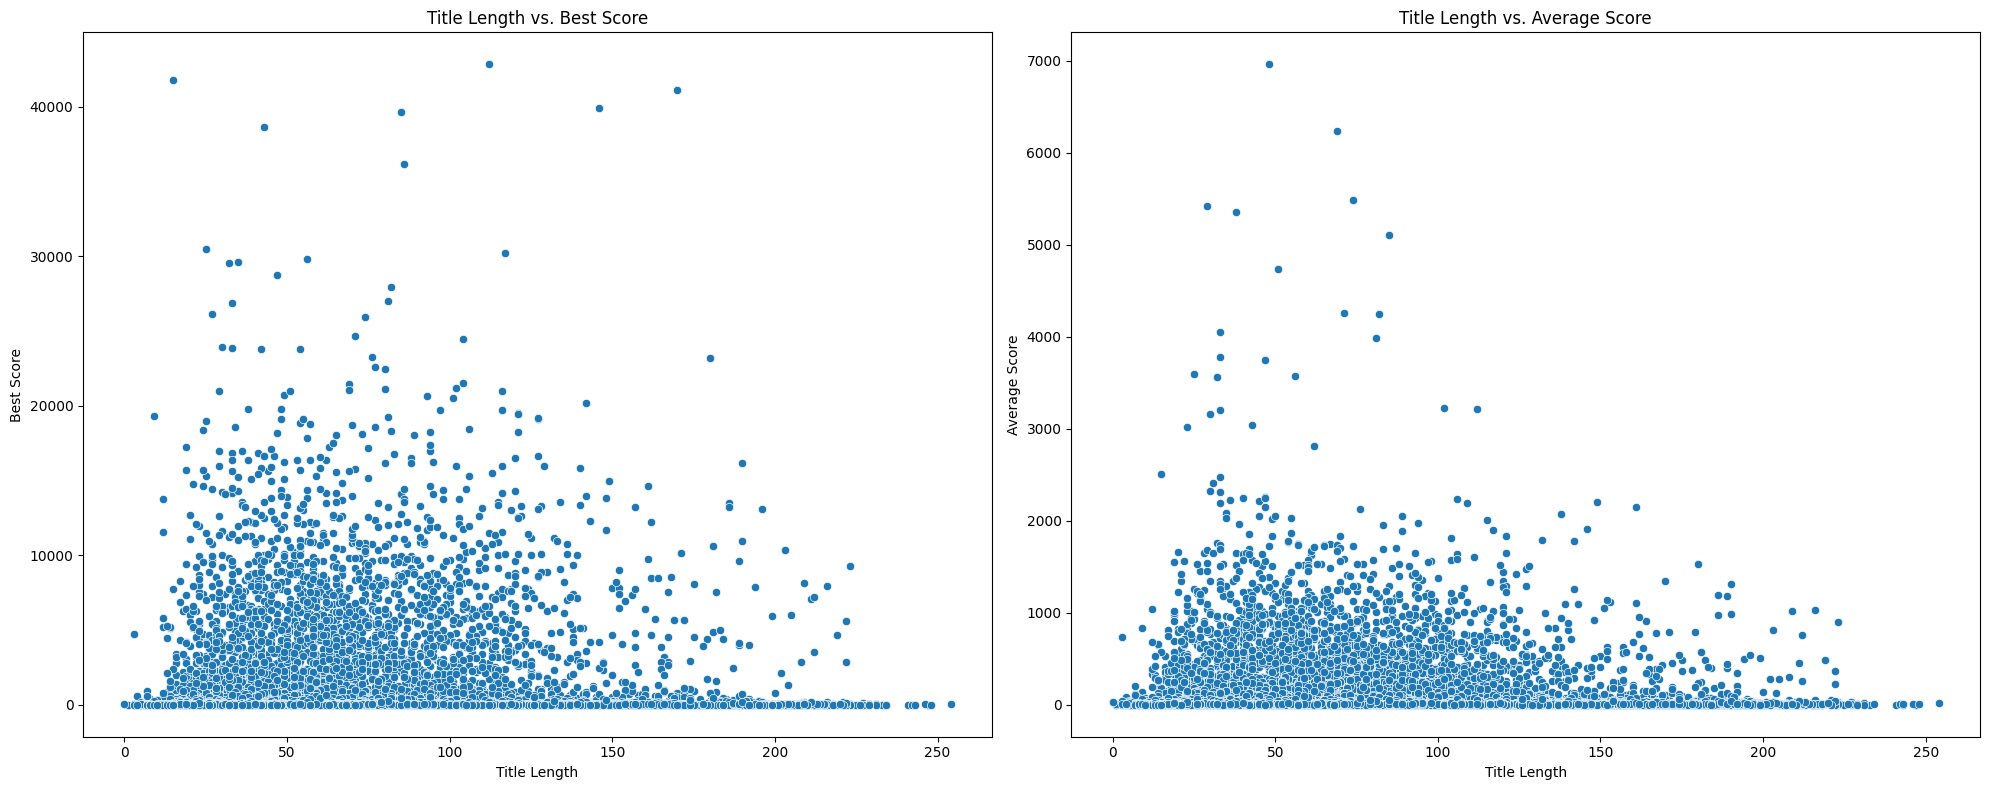

In [237]:
# Calculate correlation coefficients
correlation_best = np.corrcoef(df['title_clean_len'], df['best_score'])[0, 1]
correlation_avg = np.corrcoef(df['title_clean_len'], df['avg_score'])[0, 1]
print(f"Correlation between title length and best score: {correlation_best}")
print(f"Correlation between title length and average score: {correlation_avg}")

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(x='title_clean_len', y='best_score', data=df, ax=axes[0])
axes[0].set_title('Title Length vs. Best Score')
axes[0].set_xlabel('Title Length')
axes[0].set_ylabel('Best Score')

sns.scatterplot(x='title_clean_len', y='avg_score', data=df, ax=axes[1])
axes[1].set_title('Title Length vs. Average Score')
axes[1].set_xlabel('Title Length')
axes[1].set_ylabel('Average Score')

# Adjust layout
plt.tight_layout()
plt.show()


Correlation between title length and best score: 0.07206447513122037
Correlation between title length and average score: 0.04358696624913225


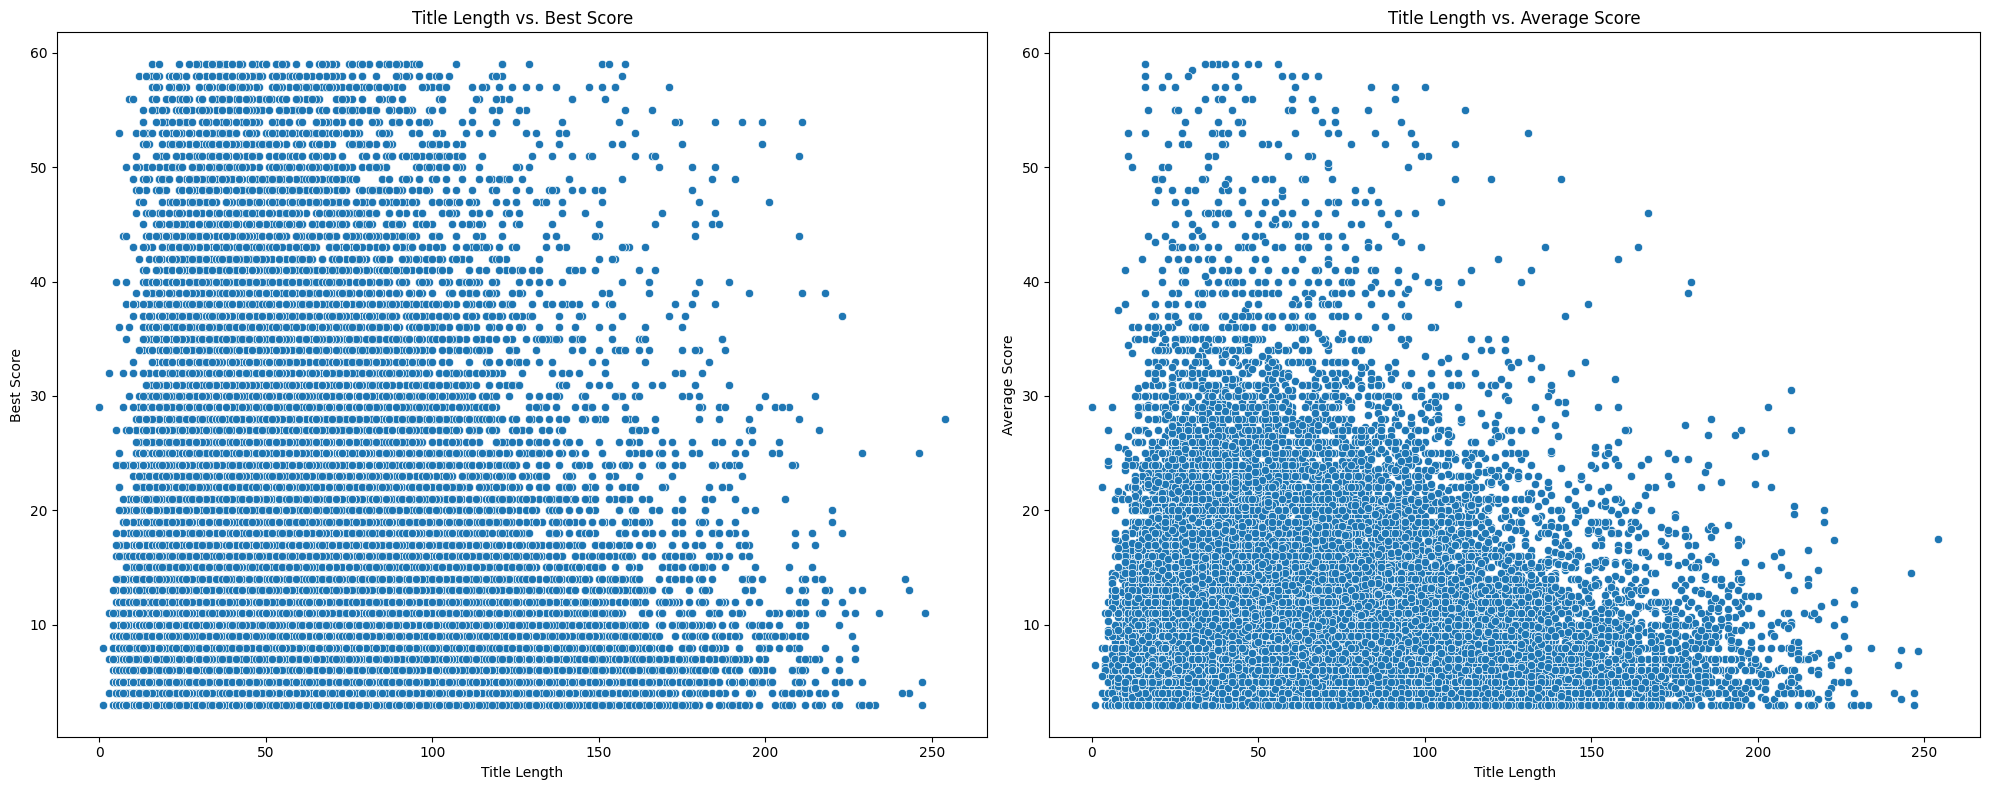

In [238]:
# Calculate correlation coefficients
correlation_best = np.corrcoef(df_clean_score['title_clean_len'], df_clean_score['best_score'])[0, 1]
correlation_avg = np.corrcoef(df_clean_score['title_clean_len'], df_clean_score['avg_score'])[0, 1]
print(f"Correlation between title length and best score: {correlation_best}")
print(f"Correlation between title length and average score: {correlation_avg}")

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(x='title_clean_len', y='best_score', data=df_clean_score, ax=axes[0])
axes[0].set_title('Title Length vs. Best Score')
axes[0].set_xlabel('Title Length')
axes[0].set_ylabel('Best Score')

sns.scatterplot(x='title_clean_len', y='avg_score', data=df_clean_score, ax=axes[1])
axes[1].set_title('Title Length vs. Average Score')
axes[1].set_xlabel('Title Length')
axes[1].set_ylabel('Average Score')

# Adjust layout
plt.tight_layout()
plt.show()


#### Same as before, we can not see any informative correlation between best or avg score with title len after cleaning. These are for clean df based on score

## Correlation analysis on Number of Answers and best and average score

Correlation between number of answers and best score: 0.5352551527827146
Correlation between number of answers and average score: 0.3857651139154748


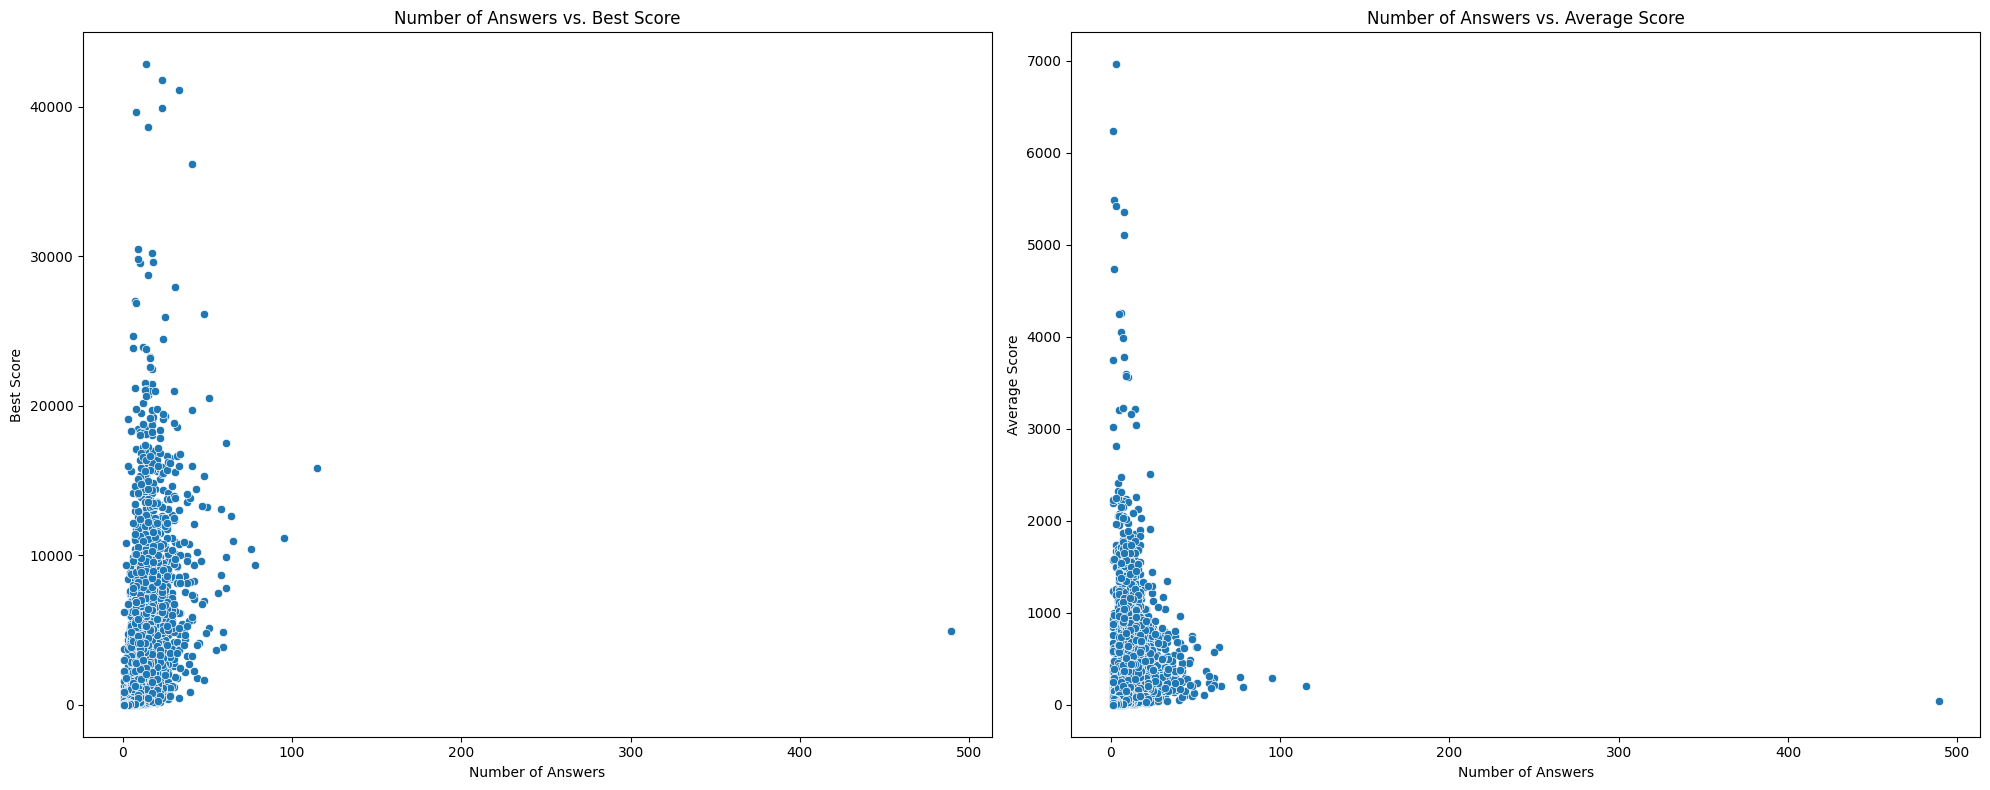

In [241]:
correlation_best = np.corrcoef(df['number_answer'], df['best_score'])[0, 1]
correlation_avg = np.corrcoef(df['number_answer'], df['avg_score'])[0, 1]
print(f"Correlation between number of answers and best score: {correlation_best}")
print(f"Correlation between number of answers and average score: {correlation_avg}")

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(x='number_answer', y='best_score', data=df, ax=axes[0])
axes[0].set_title('Number of Answers vs. Best Score')
axes[0].set_xlabel('Number of Answers')
axes[0].set_ylabel('Best Score')

sns.scatterplot(x='number_answer', y='avg_score', data=df, ax=axes[1])
axes[1].set_title('Number of Answers vs. Average Score')
axes[1].set_xlabel('Number of Answers')
axes[1].set_ylabel('Average Score')

# Adjust layout
plt.tight_layout()
plt.show()

#### These are for before applying filtering on score, we can see a significant correlation between best and avg score and number of answers. It shows when we have more answers our scores will increase and vice versa.

Correlation between number of answers and best score: 0.48938880944274216
Correlation between number of answers and average score: 0.150959580842365


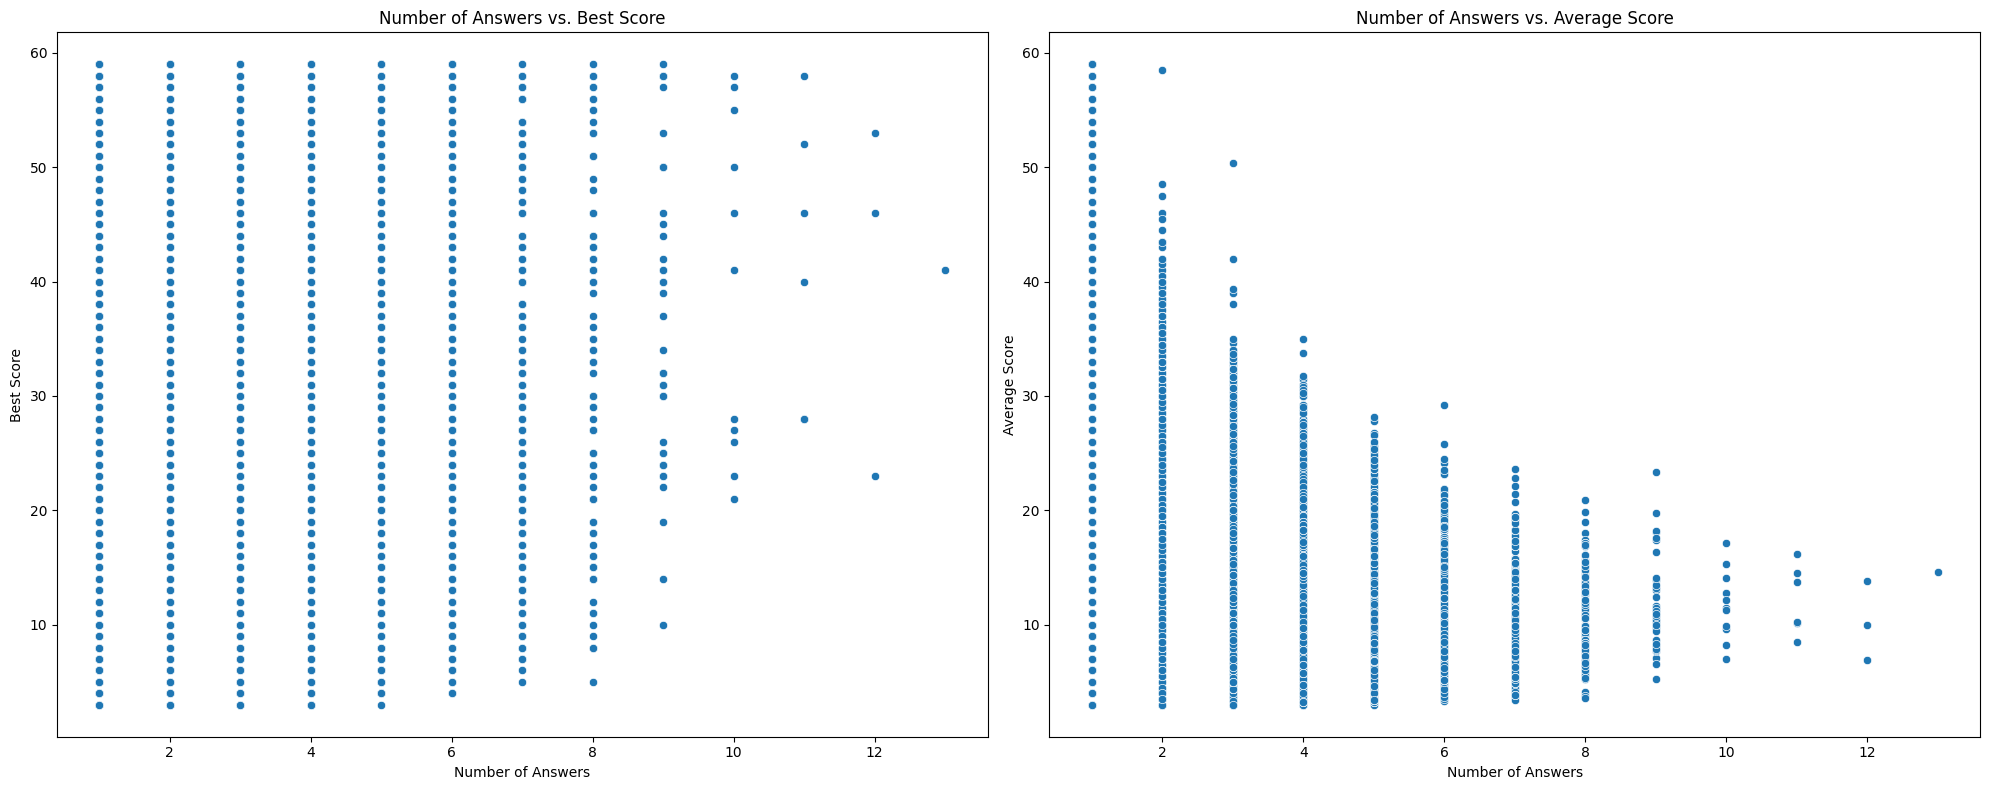

In [242]:
correlation_best = np.corrcoef(df_clean_score['number_answer'], df_clean_score['best_score'])[0, 1]
correlation_avg = np.corrcoef(df_clean_score['number_answer'], df_clean_score['avg_score'])[0, 1]
print(f"Correlation between number of answers and best score: {correlation_best}")
print(f"Correlation between number of answers and average score: {correlation_avg}")

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(x='number_answer', y='best_score', data=df_clean_score, ax=axes[0])
axes[0].set_title('Number of Answers vs. Best Score')
axes[0].set_xlabel('Number of Answers')
axes[0].set_ylabel('Best Score')

sns.scatterplot(x='number_answer', y='avg_score', data=df_clean_score, ax=axes[1])
axes[1].set_title('Number of Answers vs. Average Score')
axes[1].set_xlabel('Number of Answers')
axes[1].set_ylabel('Average Score')

# Adjust layout
plt.tight_layout()
plt.show()

### What a interesting result
#### These are for after applying filtering on score, we can see a reduction on correlation between best and avg score and number of answers in comparison of before applying filtering. 

### For category correlation analysis we only used before filtering on score because of higher value of correlation

Correlation between number of answers and best score Other: 0.6260014709546428
Correlation between number of answers and average score Other: 0.4027661850983518

Correlation between number of answers and best score Technology: 0.6351296156913522
Correlation between number of answers and average score Technology: 0.5177614086328457

Correlation between number of answers and best score Biology: 0.6192890953535172
Correlation between number of answers and average score Biology: 0.4585959627705384

Correlation between number of answers and best score Economics: 0.3816848986220314
Correlation between number of answers and average score Economics: 0.2858339032794925

Correlation between number of answers and best score Chemistry: 0.6032898844392349
Correlation between number of answers and average score Chemistry: 0.45446228686930024

Correlation between number of answers and best score Physics: 0.6431113473445903
Correlation between number of answers and average score Physics: 0.50669508028

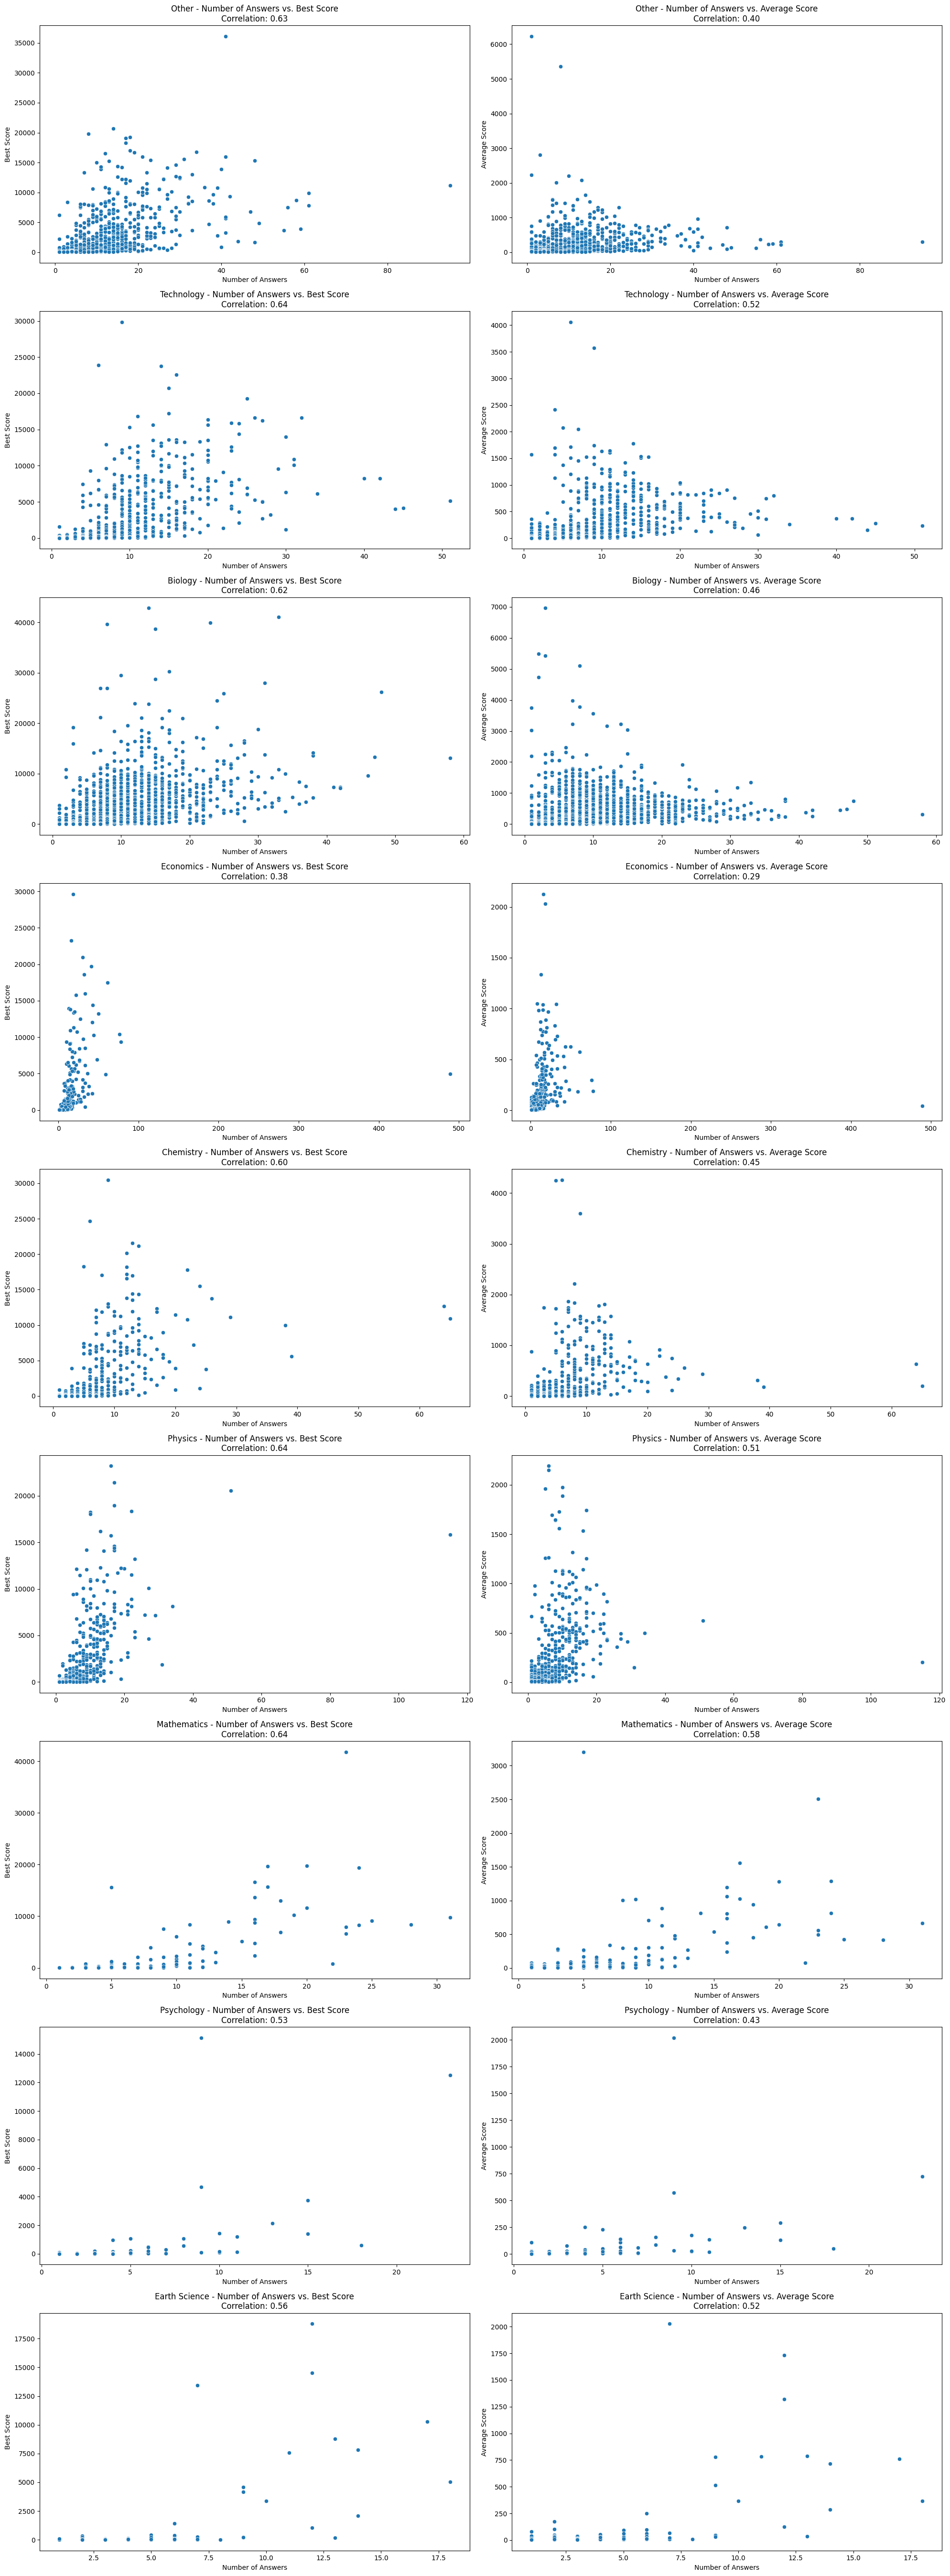

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get unique categories
categories = df['category'].unique()

n_categories = len(categories)
n_cols = 2  
n_rows = n_categories  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for idx, category in enumerate(categories):
    category_data = df[df['category'] == category]
    
    # Calculate correlation coefficients for each category
    correlation_best = np.corrcoef(category_data['number_answer'], category_data['best_score'])[0, 1]
    correlation_avg = np.corrcoef(category_data['number_answer'], category_data['avg_score'])[0, 1]
    print(f"Correlation between number of answers and best score {category}: {correlation_best}")
    print(f"Correlation between number of answers and average score {category}: {correlation_avg}")
    print()

    # Scatter plot for number of answers vs. best score
    sns.scatterplot(x='number_answer', y='best_score', data=category_data, ax=axes[idx * 2])
    axes[idx * 2].set_title(f'{category} - Number of Answers vs. Best Score\nCorrelation: {correlation_best:.2f}')
    axes[idx * 2].set_xlabel('Number of Answers')
    axes[idx * 2].set_ylabel('Best Score')
    
    # Scatter plot for number of answers vs. average score
    sns.scatterplot(x='number_answer', y='avg_score', data=category_data, ax=axes[idx * 2 + 1])
    axes[idx * 2 + 1].set_title(f'{category} - Number of Answers vs. Average Score\nCorrelation: {correlation_avg:.2f}')
    axes[idx * 2 + 1].set_xlabel('Number of Answers')
    axes[idx * 2 + 1].set_ylabel('Average Score')

# Adjust layout
plt.tight_layout()
plt.show()


#### We can see high value of correlation on all categories between number of answers and best or average score.

## Correlation analysis on Length of Answers before and after cleaning and best and average score

### Before cleaning 

Correlation between Total Answer len and best score: 0.5022496523999731
Correlation between Total Answer len and average score: 0.36672915540302076


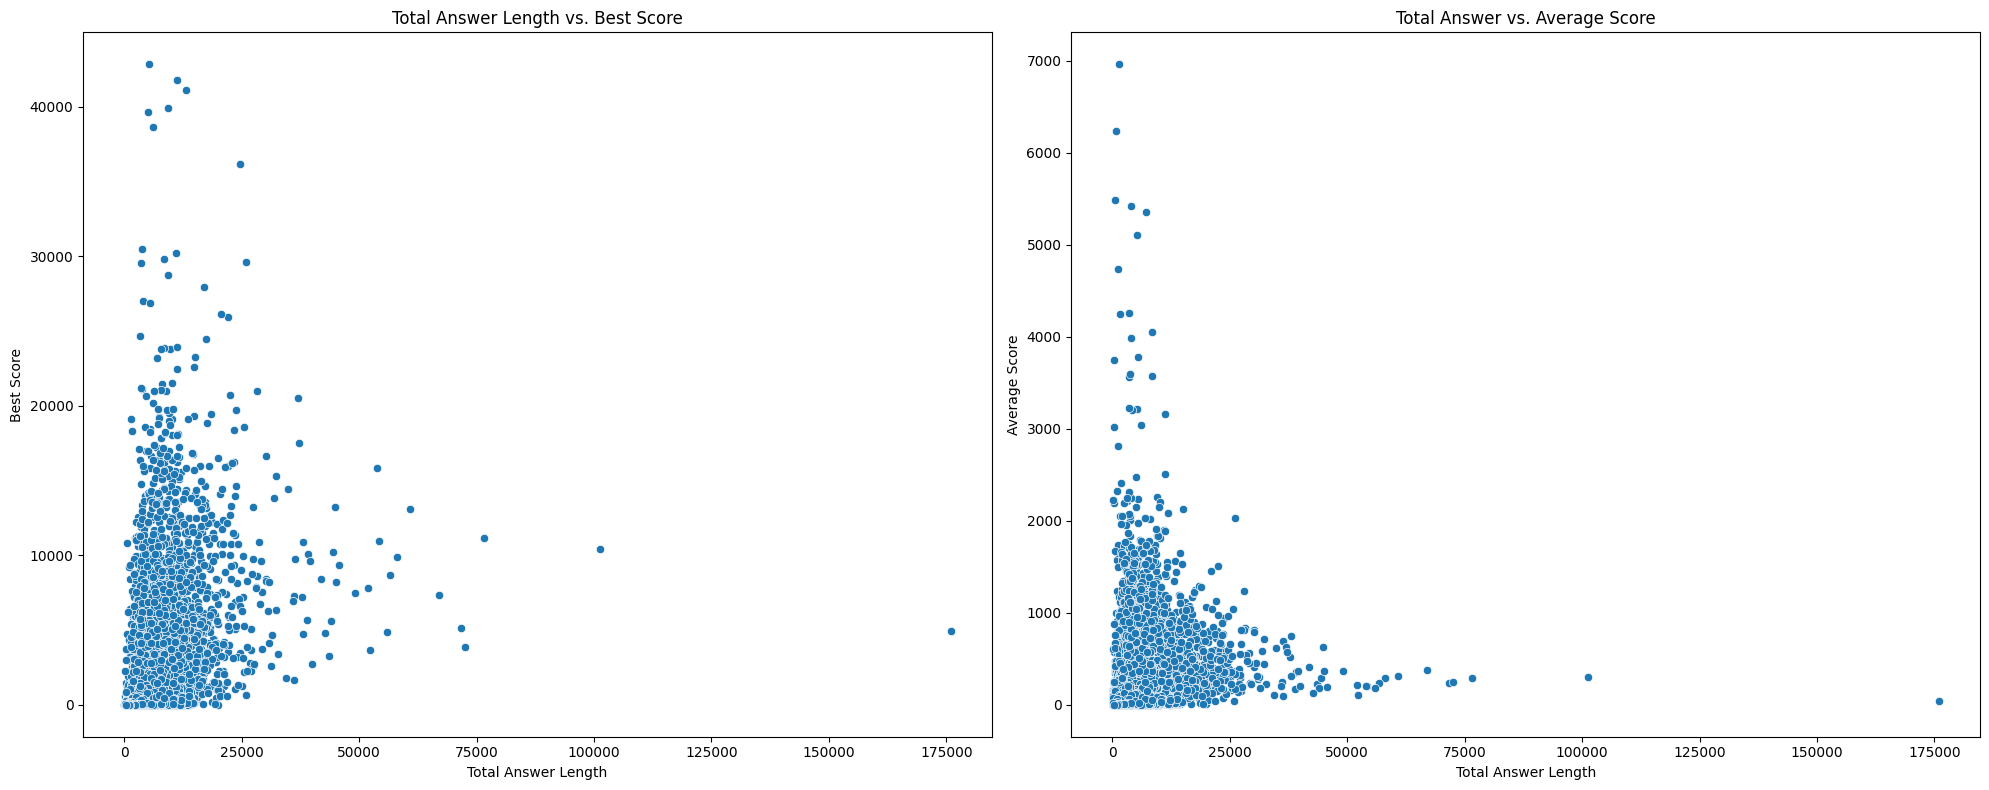

In [248]:
# Calculate correlation coefficients
correlation_best = np.corrcoef(df['total_answer_len'], df['best_score'])[0, 1]
correlation_avg = np.corrcoef(df['total_answer_len'], df['avg_score'])[0, 1]
print(f"Correlation between Total Answer len and best score: {correlation_best}")
print(f"Correlation between Total Answer len and average score: {correlation_avg}")

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(x='total_answer_len', y='best_score', data=df, ax=axes[0])
axes[0].set_title('Total Answer Length vs. Best Score')
axes[0].set_xlabel('Total Answer Length')
axes[0].set_ylabel('Best Score')

sns.scatterplot(x='total_answer_len', y='avg_score', data=df, ax=axes[1])
axes[1].set_title('Total Answer vs. Average Score')
axes[1].set_xlabel('Total Answer Length')
axes[1].set_ylabel('Average Score')

# Adjust layout
plt.tight_layout()
plt.show()


#### We can see a significant correlataion between length of answers and average or best score before cleaning answers.

Correlation between Total Clean Answer len and best score: 0.502338413709176
Correlation between Total Clean Answer len and average score: 0.3671952031391877


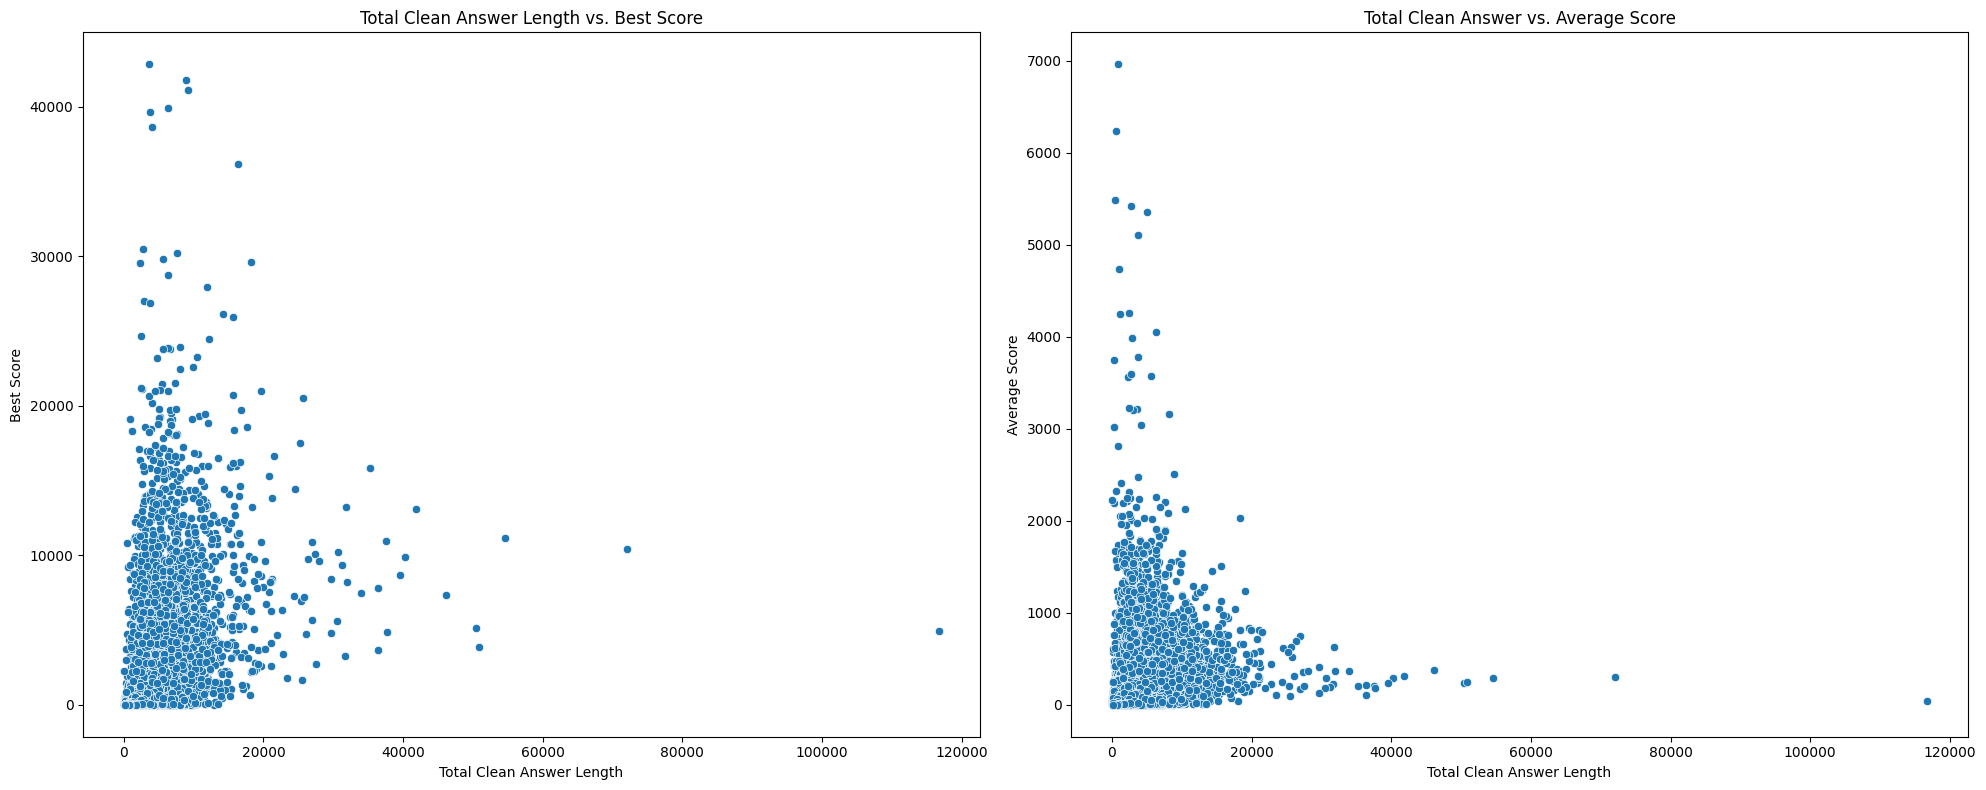

In [250]:
# Calculate correlation coefficients
correlation_best = np.corrcoef(df['total_answer_len_clean'], df['best_score'])[0, 1]
correlation_avg = np.corrcoef(df['total_answer_len_clean'], df['avg_score'])[0, 1]
print(f"Correlation between Total Clean Answer len and best score: {correlation_best}")
print(f"Correlation between Total Clean Answer len and average score: {correlation_avg}")

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(x='total_answer_len_clean', y='best_score', data=df, ax=axes[0])
axes[0].set_title('Total Clean Answer Length vs. Best Score')
axes[0].set_xlabel('Total Clean Answer Length')
axes[0].set_ylabel('Best Score')

sns.scatterplot(x='total_answer_len_clean', y='avg_score', data=df, ax=axes[1])
axes[1].set_title('Total Clean Answer vs. Average Score')
axes[1].set_xlabel('Total Clean Answer Length')
axes[1].set_ylabel('Average Score')

# Adjust layout
plt.tight_layout()
plt.show()


#### It shows very close correlation before and after cleaning, it makes sence because stop words does not impact on scores. 

### Correlation analysis on answer length and best or avg score on each category

Correlation between total answers length and best score Other: 0.5229142811970144
Correlation between total answers length and average score Other: 0.33510746630989335

Correlation between total answers length and best score Technology: 0.5703305356219963
Correlation between total answers length and average score Technology: 0.471520567032887

Correlation between total answers length and best score Biology: 0.527537188900994
Correlation between total answers length and average score Biology: 0.39783426853455717

Correlation between total answers length and best score Economics: 0.5226789080354362
Correlation between total answers length and average score Economics: 0.426259542603098

Correlation between total answers length and best score Chemistry: 0.4847243786171524
Correlation between total answers length and average score Chemistry: 0.3676699830186263

Correlation between total answers length and best score Physics: 0.5684915818791825
Correlation between total answers length and av

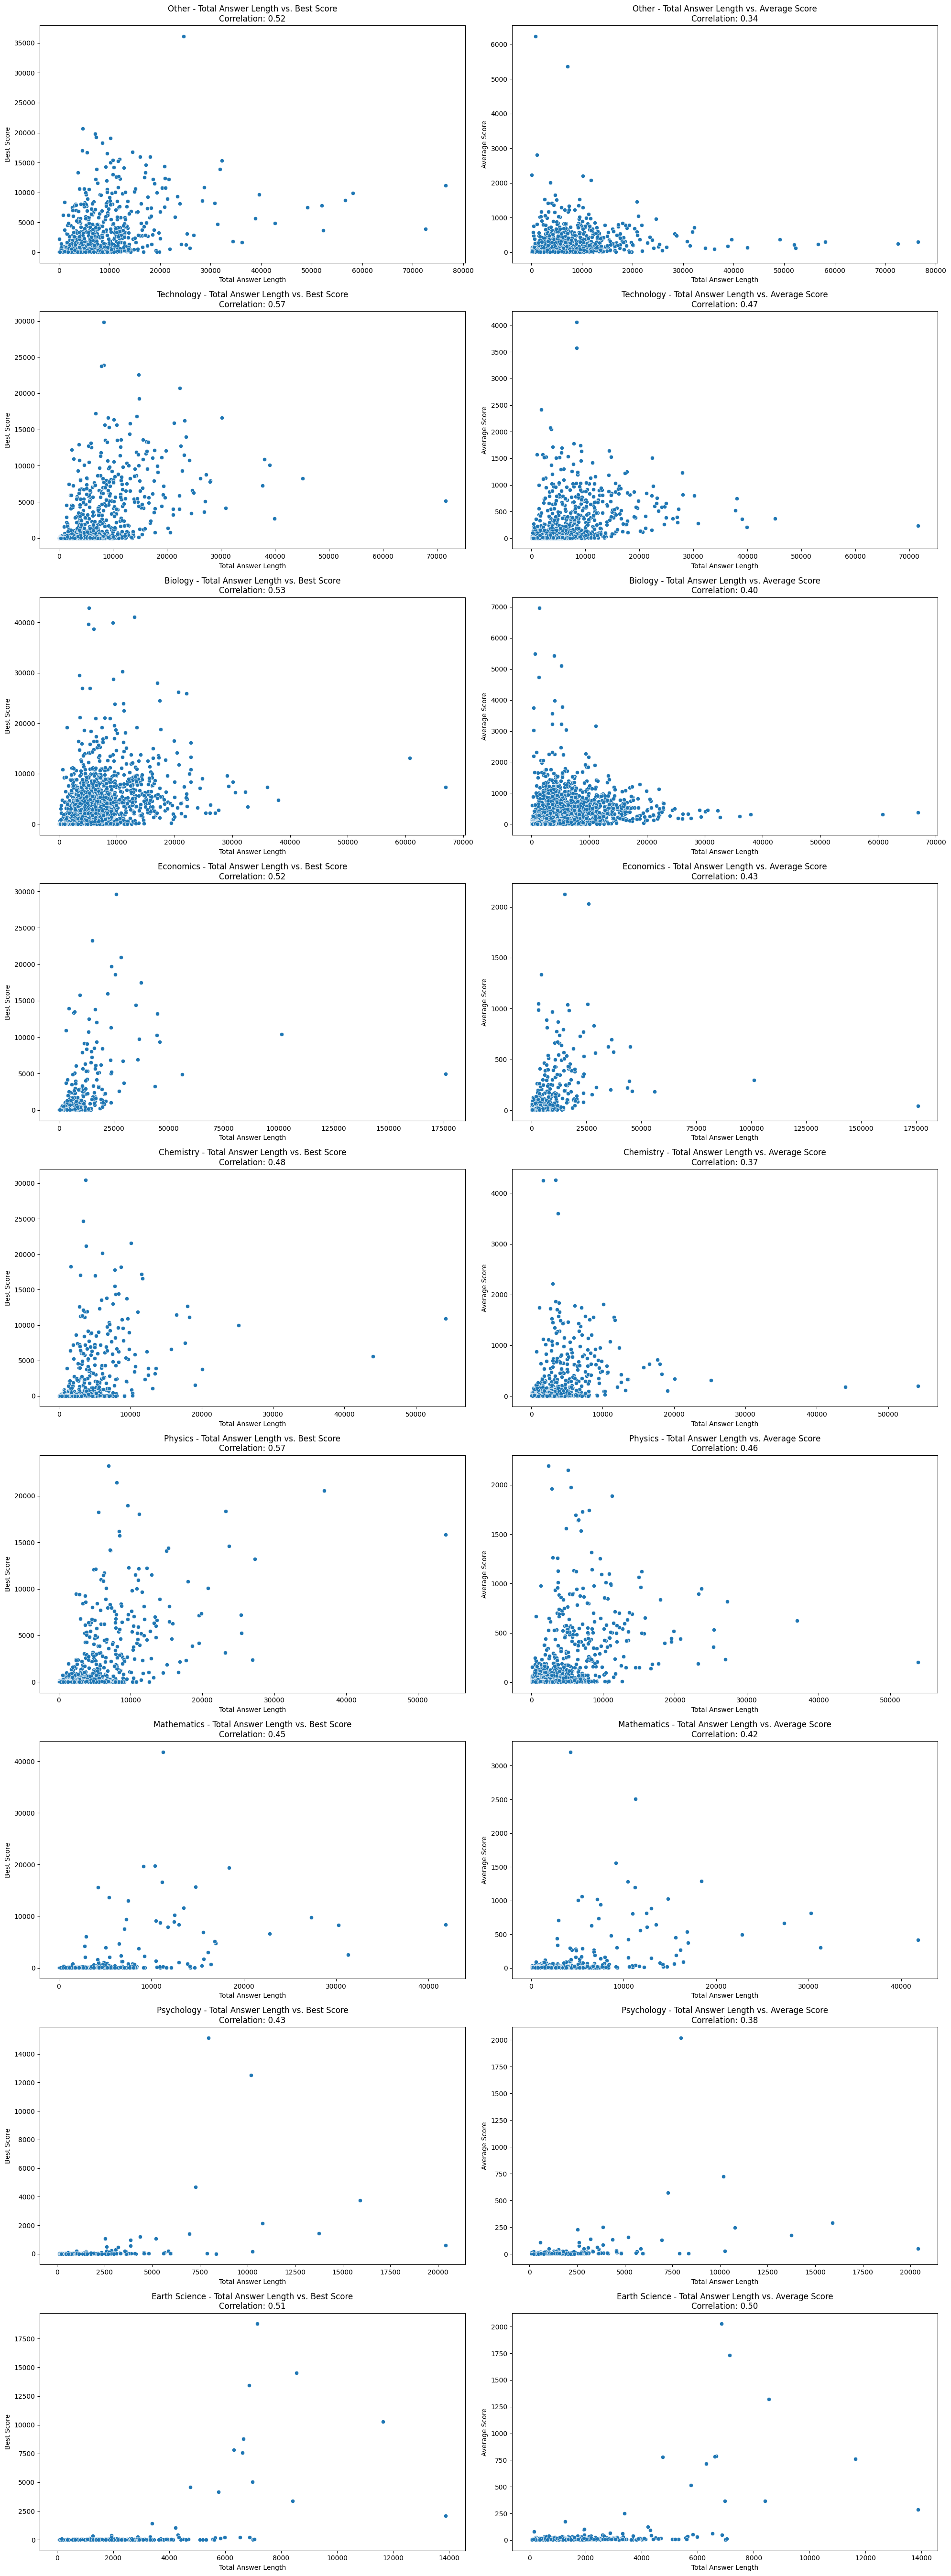

In [251]:
categories = df['category'].unique()

n_categories = len(categories)
n_cols = 2  
n_rows = n_categories  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))

axes = axes.flatten()

for idx, category in enumerate(categories):
    category_data = df[df['category'] == category]
    
    # Calculate correlation coefficients for each category
    correlation_best = np.corrcoef(category_data['total_answer_len'], category_data['best_score'])[0, 1]
    correlation_avg = np.corrcoef(category_data['total_answer_len'], category_data['avg_score'])[0, 1]
    print(f"Correlation between total answers length and best score {category}: {correlation_best}")
    print(f"Correlation between total answers length and average score {category}: {correlation_avg}")
    print()
    
    # Scatter plot for total answer length vs. best score
    sns.scatterplot(x='total_answer_len', y='best_score', data=category_data, ax=axes[idx * 2])
    axes[idx * 2].set_title(f'{category} - Total Answer Length vs. Best Score\nCorrelation: {correlation_best:.2f}')
    axes[idx * 2].set_xlabel('Total Answer Length')
    axes[idx * 2].set_ylabel('Best Score')
    
    # Scatter plot for total answer length vs. average score
    sns.scatterplot(x='total_answer_len', y='avg_score', data=category_data, ax=axes[idx * 2 + 1])
    axes[idx * 2 + 1].set_title(f'{category} - Total Answer Length vs. Average Score\nCorrelation: {correlation_avg:.2f}')
    axes[idx * 2 + 1].set_xlabel('Total Answer Length')
    axes[idx * 2 + 1].set_ylabel('Average Score')

# Adjust layout
plt.tight_layout()
plt.show()


### Title len, and Total answer len average based on category on a chart (before cleaning)

        category  avg_title_length  avg_answer_length
0        Biology         83.606732        1320.449632
1      Chemistry         78.025780        1152.779888
2  Earth Science         87.713442        1391.480059
3      Economics         84.298424        2038.718692
4    Mathematics         69.084205        2146.956067
5          Other         85.174814        1538.858068
6        Physics         83.649568        1425.501471
7     Psychology         80.210059        1648.579882
8     Technology         84.185834        1662.312028


/var/folders/s6/9x12s9l916b8zm7rydr1lvpc0000gn/T/ipykernel_82043/1422774332.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(category_stats['category'], rotation=90)


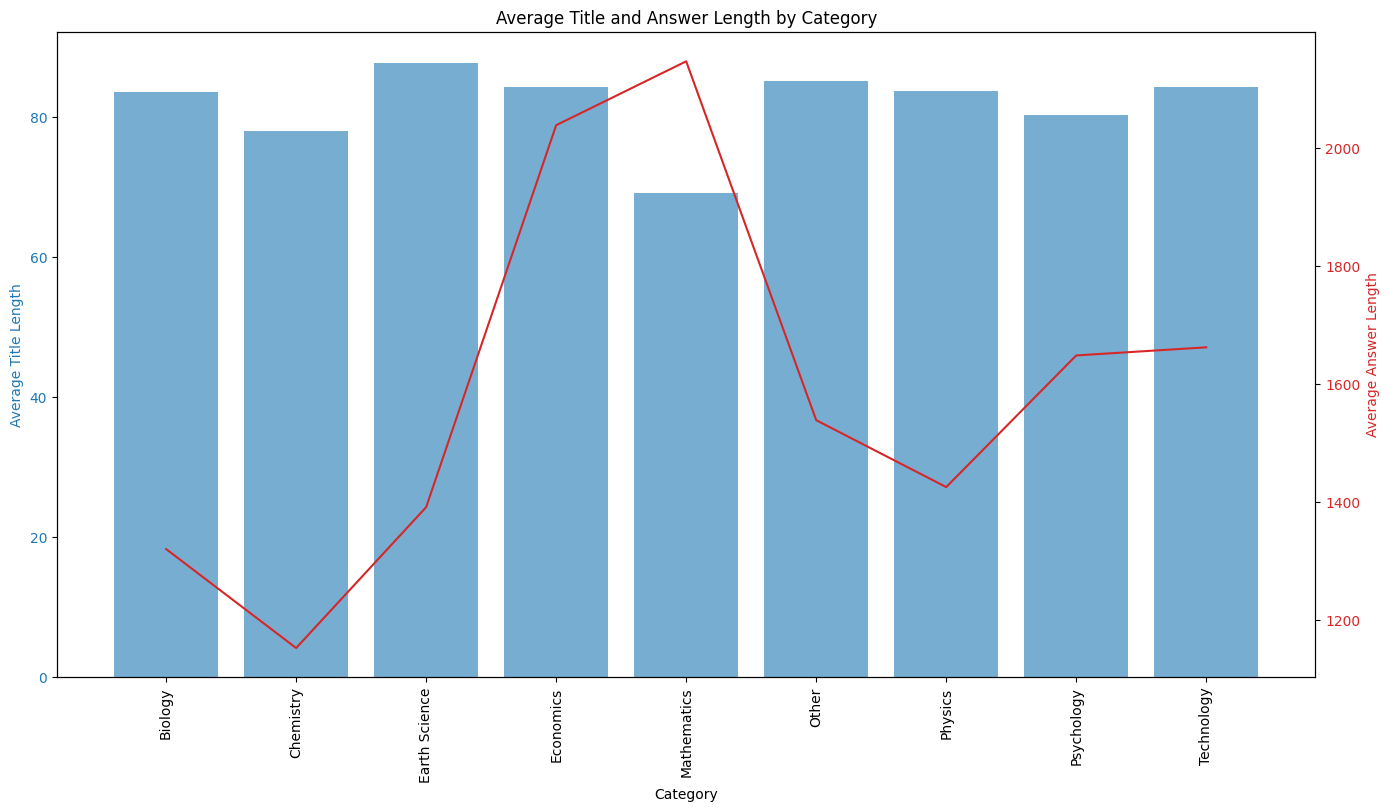

In [255]:
# Compute average title and answer length for each category
category_stats = df.groupby('category').agg(
    avg_title_length=pd.NamedAgg(column='title_len', aggfunc='mean'),
    avg_answer_length=pd.NamedAgg(column='total_answer_len', aggfunc='mean')
).reset_index()

print(category_stats)

# Plot average title and answer length for each category
fig, ax1 = plt.subplots(figsize=(14, 8))

color = 'tab:blue'
ax1.set_xlabel('Category')
ax1.set_ylabel('Average Title Length', color=color)
ax1.bar(category_stats['category'], category_stats['avg_title_length'], color=color, alpha=0.6, 
        label='Avg Title Length')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(category_stats['category'], rotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Average Answer Length', color=color)  # we already handled the x-label with ax1
ax2.plot(category_stats['category'], category_stats['avg_answer_length'], color=color, label='Avg Answer Length')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Average Title and Answer Length by Category')
plt.show()

# Save the results to a CSV file
category_stats.to_csv('category_stats.csv', index=False)

In [ ]:
### Title len, and Total answer len average based on category on a chart (after cleaning)

        category  avg_title_length  avg_answer_length
0        Biology         55.291037         913.184412
1      Chemistry         53.478818         806.594754
2  Earth Science         58.041359         955.864106
3      Economics         58.496187        1414.125911
4    Mathematics         48.180962        1504.439331
5          Other         58.068092        1066.983482
6        Physics         56.303256         978.183307
7     Psychology         54.789941        1123.653846
8     Technology         58.448411        1156.569973


/var/folders/s6/9x12s9l916b8zm7rydr1lvpc0000gn/T/ipykernel_82043/1012582925.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(category_stats['category'], rotation=90)


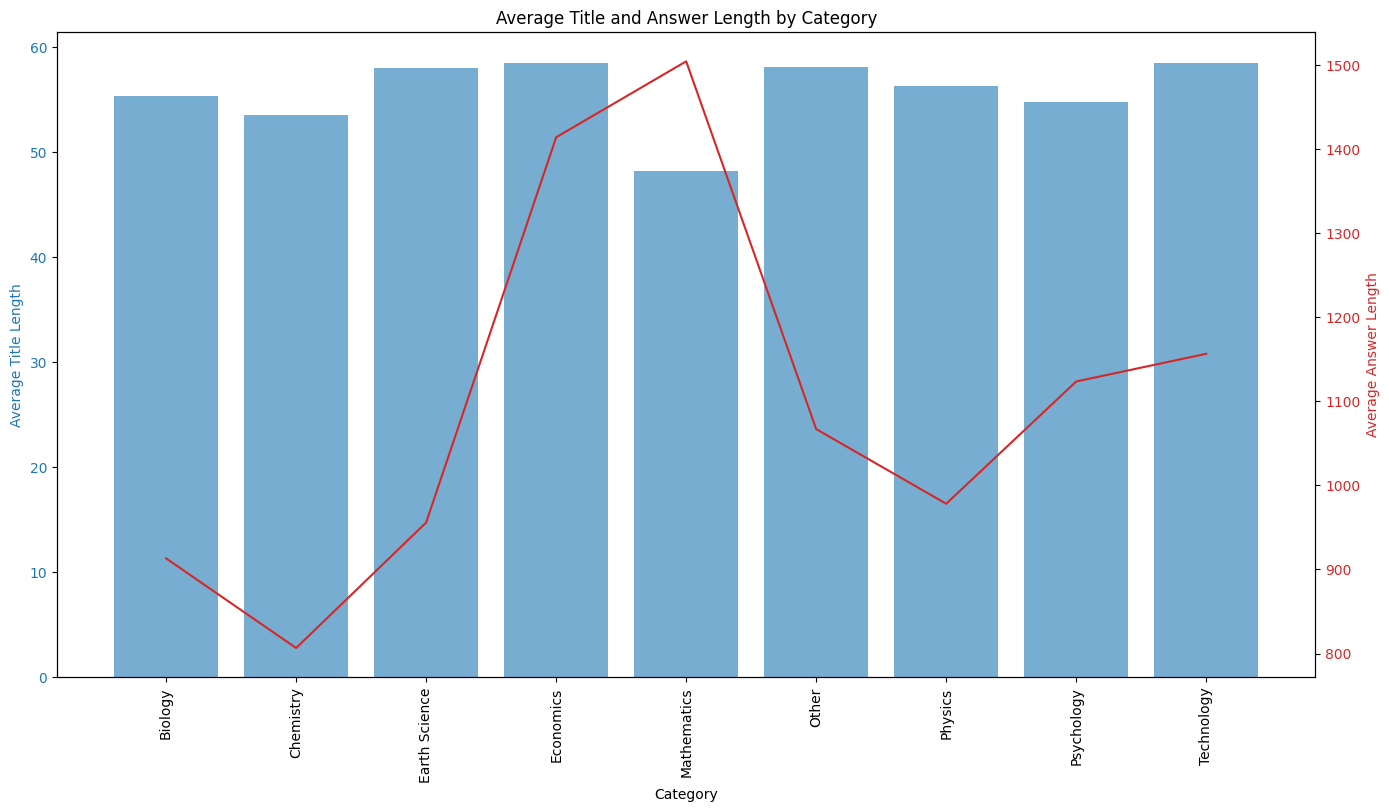

In [257]:
# Compute average title and answer length for each category
category_stats = df.groupby('category').agg(
    avg_title_length=pd.NamedAgg(column='title_clean_len', aggfunc='mean'),
    avg_answer_length=pd.NamedAgg(column='total_answer_len_clean', aggfunc='mean')
).reset_index()

print(category_stats)

# Plot average title and answer length for each category
fig, ax1 = plt.subplots(figsize=(14, 8))

color = 'tab:blue'
ax1.set_xlabel('Category')
ax1.set_ylabel('Average Title Length', color=color)
ax1.bar(category_stats['category'], category_stats['avg_title_length'], color=color, alpha=0.6, 
        label='Avg Title Length')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(category_stats['category'], rotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Average Answer Length', color=color)  # we already handled the x-label with ax1
ax2.plot(category_stats['category'], category_stats['avg_answer_length'], color=color, label='Avg Answer Length')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Average Title and Answer Length by Category')
plt.show()

# Save the results to a CSV file
category_stats.to_csv('category_stats.csv', index=False)

## Indexing

In [259]:
!pip install -q python-terrier

In [260]:
import pyterrier as pt

if not pt.started():
    pt.init()

In [261]:
documents = list()
for index, item in enumerate(json_data):
    if 'title' in item:
        documents.append([str(index)+'_'+item['q_id'], item['title']])
    if 'answers' in item:
        for answer, a_id in zip(item['answers']['text'],item['answers']['a_id']):
            documents.append([str(index)+'_'+a_id, answer])

documents[:10]

[['0_5lchat', "Why there was a 'leap second' added to the end of 2016?"],
 ['0_dbuoyxl',
  'the rotation of the earth is not a constant. in fact the rotation of the earth is slowing down, which means that a full day is getting slightly longer. without leap seconds our clocks would slowly drift ever so slightly out of sync with the actual day. we could deal with this by redefining how how long 1 second is, making it slightly longer so that one day is still exactly 24*60*60 seconds. but in practice that is really inconvenient for a lot of our technology which relies on very precise timing. its easier to just move us ahead one second every couple of years or so.'],
 ['0_dbur7gi',
  "The Earth's rotation is not regular. It varies a bit, so sometimes we add a second. We do this to ensure that noon is always going to be sometime around mid-day. If we did not add leap seconds, over a very long period of time where the Earth's rotation slowly changed, noon could end up being at dusk. We want t

In [40]:
import pandas as pd

docs_df = pd.DataFrame(documents, columns=["docno", "text"])
docs_df.head()

docno                                               text
0   0_5lchat  Why there was a 'leap second' added to the end...
1  0_dbuoyxl  the rotation of the earth is not a constant. i...
2  0_dbur7gi  The Earth's rotation is not regular. It varies...
3  0_dbuotht  Because the Earth's rotation is slowing. If yo...
4   1_5lcjq6                How do you claim undiscovered land?

In [42]:
indexer = pt.DFIndexer("./index_3docs", overwrite=True)
index_ref = indexer.index(docs_df["text"], docs_df["docno"])
index_ref.toString()

11:40:29.067 [main] WARN org.terrier.structures.indexing.Indexer - Adding an empty document to the index (660_5n3vgg) - further warnings are suppressed
11:44:14.616 [main] WARN org.terrier.structures.indexing.Indexer - Indexed 16 empty documents


'./index_3docs/data.properties'

In [44]:
index = pt.IndexFactory.of(index_ref)

print(index.getCollectionStatistics().toString())

Number of documents: 315861
Number of terms: 84478
Number of postings: 8798222
Number of fields: 0
Number of tokens: 12056280
Field names: []
Positions:   false



In [62]:
term = "real"
try:
  pointer = index.getLexicon()[term]
  for posting in index.getInvertedIndex().getPostings(pointer):
      regex = 'ID\((\d+)\) TF\((\d+)\)'
      pos = re.findall(regex, posting.toString())[0]
      print(f"found {pos[1]} time(s) in document {pos[0]} (text with id {documents[int(pos[0])][0].split('_')[1]} in argument number {documents[int(pos[0])][0].split('_')[0]})" )
except:
    print('word not found')

Streaming output truncated to the last 5000 lines.
found 1 time(s) in document 104766 (text with id dw7jby2 in argument number 29938)
found 1 time(s) in document 104846 (text with id dw82aol in argument number 29959)
found 1 time(s) in document 104848 (text with id dw877a7 in argument number 29960)
found 2 time(s) in document 104922 (text with id dw90qww in argument number 29988)
found 1 time(s) in document 105147 (text with id dwb69p8 in argument number 30060)
found 1 time(s) in document 105148 (text with id dwb6g6y in argument number 30060)
found 1 time(s) in document 105244 (text with id dwdct20 in argument number 30092)
found 1 time(s) in document 105366 (text with id dwdx81k in argument number 30132)
found 1 time(s) in document 105483 (text with id dwfcior in argument number 30171)
found 2 time(s) in document 105491 (text with id 87s46l in argument number 30173)
found 1 time(s) in document 105492 (text with id dwfbs00 in argument number 30173)
found 2 time(s) in document 105493 (t

In [66]:
queries = pd.DataFrame([["query1", "articles"], ["query2", "technology"]], columns=["qid", "query"])

br = pt.BatchRetrieve(index, wmodel="TF_IDF")
br(queries)

qid   docid          docno  rank     score       query
0     query1  202343   58907_em0vgi     0  7.480505    articles
1     query1   28118   8185_deezvpw     1  7.396128    articles
2     query1  214769  62455_gbgfznz     2  7.224641    articles
3     query1   80320   22839_9ou3ub     3  7.192710    articles
4     query1  107973   30915_8bfdam     4  7.153191    articles
...      ...     ...            ...   ...       ...         ...
1995  query2  267678  78100_g250zym   995  4.001541  technology
1996  query2   38690  11042_dg90orl   996  3.996478  technology
1997  query2  121484  34851_e1mw3og   997  3.996478  technology
1998  query2  315047  91558_h3125g3   998  3.996478  technology
1999  query2   21498   6340_ddcdk5n   999  3.994464  technology

[2000 rows x 6 columns]

## Word2Vec

In [4]:
!pip install --upgrade gensim

In [17]:
import re

sentences = list()
for item in json_data:
    if 'title' in item:
        sentences += re.split('[?!.]\s', item['title'])
    if 'answers' in item:
        for answer in item['answers']['text']:
            sentences += re.split('[?!.]\s', answer)


sentences[:10]

["Why there was a 'leap second' added to the end of 2016?",
 'the rotation of the earth is not a constant',
 'in fact the rotation of the earth is slowing down, which means that a full day is getting slightly longer',
 'without leap seconds our clocks would slowly drift ever so slightly out of sync with the actual day',
 'we could deal with this by redefining how how long 1 second is, making it slightly longer so that one day is still exactly 24*60*60 seconds',
 'but in practice that is really inconvenient for a lot of our technology which relies on very precise timing',
 'its easier to just move us ahead one second every couple of years or so.',
 "The Earth's rotation is not regular",
 'It varies a bit, so sometimes we add a second',
 'We do this to ensure that noon is always going to be sometime around mid-day']

In [25]:
tokenized_sentences = [re.sub('\W', ' ', sentence).lower().split() for sentence in sentences]
tokenized_sentences = [sentence for sentence in tokenized_sentences if len(sentence) > 1]

for sentence in tokenized_sentences[:10]:
    print(sentence)

['why', 'there', 'was', 'a', 'leap', 'second', 'added', 'to', 'the', 'end', 'of', '2016']
['the', 'rotation', 'of', 'the', 'earth', 'is', 'not', 'a', 'constant']
['in', 'fact', 'the', 'rotation', 'of', 'the', 'earth', 'is', 'slowing', 'down', 'which', 'means', 'that', 'a', 'full', 'day', 'is', 'getting', 'slightly', 'longer']
['without', 'leap', 'seconds', 'our', 'clocks', 'would', 'slowly', 'drift', 'ever', 'so', 'slightly', 'out', 'of', 'sync', 'with', 'the', 'actual', 'day']
['we', 'could', 'deal', 'with', 'this', 'by', 'redefining', 'how', 'how', 'long', '1', 'second', 'is', 'making', 'it', 'slightly', 'longer', 'so', 'that', 'one', 'day', 'is', 'still', 'exactly', '24', '60', '60', 'seconds']
['but', 'in', 'practice', 'that', 'is', 'really', 'inconvenient', 'for', 'a', 'lot', 'of', 'our', 'technology', 'which', 'relies', 'on', 'very', 'precise', 'timing']
['its', 'easier', 'to', 'just', 'move', 'us', 'ahead', 'one', 'second', 'every', 'couple', 'of', 'years', 'or', 'so']
['the', '

In [27]:
from gensim.models.word2vec import Word2Vec

model = Word2Vec(tokenized_sentences, vector_size=30, min_count=5, window=10)
print(len(model.wv))

46083


In [28]:
term = 'precise'
model.wv.most_similar(term)

[('accurate', 0.8977315425872803),
 ('consistent', 0.8595756888389587),
 ('predictable', 0.8299376964569092),
 ('accurately', 0.8029716610908508),
 ('useful', 0.7668538093566895),
 ('inaccurate', 0.7574788331985474),
 ('precisely', 0.7562442421913147),
 ('straightforward', 0.7324930429458618),
 ('simple', 0.7292923331260681),
 ('complex', 0.7158787846565247)]

In [74]:
vec = model.wv['good'] + (model.wv['dirty'] - model.wv['clean'])
model.wv.similar_by_vector(vec)

[('good', 0.8750431537628174),
 ('terrible', 0.795555830001831),
 ('bad', 0.7903792858123779),
 ('real', 0.7898874878883362),
 ('fair', 0.7741212844848633),
 ('fun', 0.7559671998023987),
 ('great', 0.7145730257034302),
 ('big', 0.6891367435455322),
 ('decent', 0.685980498790741),
 ('weird', 0.6711380481719971)]

# Clustering

In [121]:
import string
import numpy as np
import nltk
nltk.download('stopwords')

stop_words = set(nltk.corpus.stopwords.words('english'))

regex = '[' + string.punctuation + ']'
data = list()
labels = list()
indices = list()

c = 0
for item in json_data:
    if 'title' in item:
        tokens = re.sub(regex, '', item["title"].lower()).split()
        filtered_tokens = [token for token in tokens if token not in stop_words]
        sum_vector = sum(model.wv[token] for token in filtered_tokens if token in model.wv)
        if type(sum_vector) == np.ndarray:
            data.append(sum_vector)
            labels.append(item['category'])
            indices.append(c)
        c += 1
    if 'answers' in item:
        for answer in item['answers']['text']:
            tokens = re.sub(regex, '', answer.lower()).split()
            filtered_tokens = [token for token in tokens if token not in stop_words]
            sum_vector = sum(model.wv[token] for token in filtered_tokens if token in model.wv)
            if type(sum_vector) == np.ndarray:
                data.append(sum_vector)
                labels.append(item['category'])
                indices.append(c)
            c += 1

data = np.array(data)
data[:5]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array([[ 6.03901148e-01, -1.03598461e+01, -9.78141594e+00,
        -3.28483582e+00,  5.50290298e+00,  6.01521397e+00,
        -1.45355625e+01, -2.67117560e-01, -5.54783154e+00,
        -4.43364811e+00,  1.90853608e+00,  6.88337517e+00,
         1.20702398e+00,  9.59370995e+00,  5.37997723e+00,
        -7.13014901e-01,  6.76434994e+00, -8.17983341e+00,
        -1.01508799e+01, -1.28381729e-01,  9.71189308e+00,
         5.28291845e+00,  7.44565868e+00,  5.48909855e+00,
         5.18309116e+00,  2.17289591e+00,  2.47264934e+00,
        -8.58046412e-01, -4.73767185e+00,  3.71065140e-01],
       [-1.40649242e+01, -9.42795563e+01, -8.33446884e+01,
        -5.62550659e+01,  6.83800430e+01,  3.07085629e+01,
        -6.72050323e+01,  3.60061913e+01,  3.85545502e+01,
        -1.11865265e+02, -1.85382710e+01,  6.21107979e+01,
         3.28605747e+00,  9.74922714e+01,  4.07386627e+01,
         6.70488205e+01,  9.53952713e+01, -1.15002571e+02,
        -4.32025223e+01,  7.33224106e+01,  8.55097389e+

In [147]:
from sklearn.cluster import KMeans

k = len(set(labels))

kmeans = KMeans(n_clusters=k, max_iter=100, n_init=2, verbose=True)
kmeans.fit(data)

Initialization complete
Iteration 0, inertia 25626759168.0.
Iteration 1, inertia 19154843648.0.
Iteration 2, inertia 18604623872.0.
Iteration 3, inertia 18433773568.0.
Iteration 4, inertia 18359431168.0.
Iteration 5, inertia 18319839232.0.
Iteration 6, inertia 18295384064.0.
Iteration 7, inertia 18278461440.0.
Iteration 8, inertia 18265833472.0.
Iteration 9, inertia 18255622144.0.
Iteration 10, inertia 18247239680.0.
Iteration 11, inertia 18240106496.0.
Iteration 12, inertia 18235224064.0.
Iteration 13, inertia 18231570432.0.
Iteration 14, inertia 18228789248.0.
Iteration 15, inertia 18226319360.0.
Iteration 16, inertia 18224414720.0.
Iteration 17, inertia 18222919680.0.
Iteration 18, inertia 18221383680.0.
Iteration 19, inertia 18220345344.0.
Iteration 20, inertia 18219372544.0.
Iteration 21, inertia 18218586112.0.
Iteration 22, inertia 18218070016.0.
Iteration 23, inertia 18217746432.0.
Iteration 24, inertia 18217394176.0.
Iteration 25, inertia 18217254912.0.
Iteration 26, inertia 18

KMeans(max_iter=100, n_clusters=9, n_init=2, verbose=True)

In [148]:
for i in range(kmeans.n_clusters):
    centroid = kmeans.cluster_centers_[i]
    print(model.wv.similar_by_vector(centroid))


[('game', 0.692791223526001), ('time', 0.6921694874763489), ('console', 0.6833893656730652), ('accounted', 0.6746514439582825), ('computer', 0.6647235751152039), ('pc', 0.6604994535446167), ('hardware', 0.6584118008613586), ('server', 0.6562513113021851), ('isp', 0.650863528251648), ('track', 0.6494516730308533)]
[('bloodstream', 0.7850677371025085), ('body', 0.7810458540916443), ('intestines', 0.7304621934890747), ('skin', 0.7296375036239624), ('heat', 0.7229770421981812), ('saliva', 0.7173212170600891), ('bowels', 0.7150048017501831), ('moisture', 0.7062267661094666), ('water', 0.7012532949447632), ('absorbed', 0.6963119506835938)]
[('orbit', 0.7546758055686951), ('spin', 0.7518723607063293), ('electrons', 0.7511326670646667), ('light', 0.7452930212020874), ('point', 0.7399499416351318), ('moving', 0.7338224053382874), ('nucleus', 0.7321650385856628), ('object', 0.7301822900772095), ('surface', 0.726740300655365), ('space', 0.7264242172241211)]
[('time', 0.7030897736549377), ('point'

In [149]:
ind = 456
i = indices[ind]
print(documents[i][1])
print(labels[ind])
centroid = kmeans.cluster_centers_[kmeans.labels_[ind]]
print(model.wv.similar_by_vector(centroid))


Hunger is caused by a region in your brain called the hypothalamus, which regulates many different types of involuntary activities. The hypothalamus makes you feel full or hungry based on chemical hormone signals, nerve signals, and the type of food we last ate (more or less satiated for longer). Nerve signals from the stomach and small intestine detect pressure changes (distended or empty). Ghrelin stimulates secretion of neuropeptide Y which causes people to feel hungry; gherlin is released two hours after people eat and is associated with insulin levels.
Biology
[('bloodstream', 0.7850677371025085), ('body', 0.7810458540916443), ('intestines', 0.7304621934890747), ('skin', 0.7296375036239624), ('heat', 0.7229770421981812), ('saliva', 0.7173212170600891), ('bowels', 0.7150048017501831), ('moisture', 0.7062267661094666), ('water', 0.7012532949447632), ('absorbed', 0.6963119506835938)]


In [150]:
print('Number of docs in: ')

for i in range(kmeans.n_clusters):
    print(f"Cluster {i}: {np.sum(kmeans.labels_ == i)}")

Number of docs in: 
Cluster 0: 39356
Cluster 1: 44554
Cluster 2: 1184
Cluster 3: 200115
Cluster 4: 5992
Cluster 5: 1025
Cluster 6: 7995
Cluster 7: 11531
Cluster 8: 3967


In [151]:
from sklearn import metrics

unique_labels = list(set(labels))
print(unique_labels)
num_labels = [unique_labels.index(label) for label in labels]

print(metrics.confusion_matrix(num_labels, kmeans.labels_))

print('Extrinsic evaluation measures:')
print("Homogeneity:", str(metrics.homogeneity_score(num_labels, kmeans.labels_)))
print("Completeness:", str(metrics.completeness_score(num_labels, kmeans.labels_)))
print("V-measure:", str(metrics.v_measure_score(num_labels, kmeans.labels_)))
print("Adjusted Rand-Index:", str(metrics.adjusted_rand_score(num_labels, kmeans.labels_)))


['Physics', 'Other', 'Mathematics', 'Psychology', 'Economics', 'Biology', 'Earth Science', 'Technology', 'Chemistry']
[[ 1916  5621   555 19272    32     1    16  5437   140]
 [12199  4361    75 48265   389   250  2733  1153   466]
 [ 2214    68    36  3845     6     3    90   213   511]
 [  216    95     0   849    35     0    15     2     6]
 [ 4786   117     1 12779     6   684  4247    26    29]
 [ 5233 26389   188 71853  5174    26   197  1253   244]
 [  112   487    20  1510     9     1    11   242     2]
 [12253  2077   175 28382    43    59   642  1937  2558]
 [  427  5339   134 13360   298     1    44  1268    11]]
Extrinsic evaluation measures:
Homogeneity: 0.08574826015836458
Completeness: 0.1231297322756496
V-measure: 0.10109404244429981
Adjusted Rand-Index: 0.03462530352958032
